In [ ]:
# 코랩 연걸
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
datapath_st = '/content/drive/MyDrive/공모전/data/한국지능정보사회진흥원_2021년 사이버폭력 실태조사 통계자료(학생)_20211231.csv'
datapath_ad = '/content/drive/MyDrive/공모전/data/한국지능정보사회진흥원_2021년 사이버폭력 실태조사 통계자료(성인)_20211231.csv' 
data_s = pd.read_csv(datapath_st, encoding = 'cp949')
data_a = pd.read_csv(datapath_ad, encoding = 'cp949')

<ipython-input-3-fa74612535d0>:3: DtypeWarning: Columns (95) have mixed types. Specify dtype option on import or set low_memory=False.
  data_s = pd.read_csv(datapath_st, encoding = 'cp949')
<ipython-input-3-fa74612535d0>:4: DtypeWarning: Columns (82,105,172,203) have mixed types. Specify dtype option on import or set low_memory=False.
  data_a = pd.read_csv(datapath_ad, encoding = 'cp949')


In [ ]:
data_s.tail()

,idx,학교,시도,행정구,행정구역분류,학교급,고등학교유형,학교세부유형,남녀공학구분,지역규모,...,A_5,A_6,A_7,A_8,A_7_etc,B_1,B_2,C,D,WT
9012,9013,5022,경북,구미시,37-37050,고등학교,특성화고(직업),가사고등학교,남여공학,면지역,...,5.0,NaN,NaN,NaN,NaN,99,5,5,4,437.728571
9013,9014,5022,경북,구미시,37-37050,고등학교,특성화고(직업),가사고등학교,남여공학,면지역,...,5.0,NaN,NaN,NaN,NaN,7,99,4,4,437.728571
9014,9015,5022,경북,구미시,37-37050,고등학교,특성화고(직업),가사고등학교,남여공학,면지역,...,5.0,NaN,NaN,NaN,NaN,5,5,2,4,437.728571
9015,9016,5022,경북,구미시,37-37050,고등학교,특성화고(직업),가사고등학교,남여공학,면지역,...,5.0,NaN,NaN,NaN,NaN,4,4,2,2,437.728571
9016,9017,5022,경북,구미시,37-37050,고등학교,특성화고(직업),가사고등학교,남여공학,면지역,...,NaN,NaN,NaN,NaN,NaN,4,5,3,4,437.728571


In [ ]:
data_a.tail()

,ID,AREA,SCALE,AREACODE,CID,GID,AREA1,AREA2,AREA3,AREA4,...,DQ1_ETC,DQ2_1,DQ2_2,DQ3,DQ4,DQ5,DQ5_1,DQ5_1_ETC,END,WT
7495,36218,11,1,1103064008A,59,59,서울특별시,용산구,이촌2동,422번지,...,NaN,5,1.0,2,5,2,NaN,NaN,NaN,3920.081081
7496,36293,11,1,11030711101,6,8,서울특별시,용산구,청파동,3-3번지,...,NaN,4,1.0,2,5,2,NaN,NaN,NaN,3920.081081
7497,36429,11,1,1112052230A,18,17,서울특별시,은평구,불광1동,635번지,...,NaN,4,1.0,2,5,2,NaN,NaN,NaN,4716.767296
7498,36434,11,1,1112052230A,23,22,서울특별시,은평구,불광1동,635번지,...,NaN,6,1.0,2,5,2,NaN,NaN,NaN,4328.738372
7499,36439,11,1,1112052230A,28,27,서울특별시,은평구,불광1동,635번지,...,NaN,6,1.0,2,5,2,NaN,NaN,NaN,4328.738372


In [ ]:
data_s.shape, data_a.shape

((9017, 244), (7500, 213))

In [ ]:
data_s['학교급'].value_counts()

초등학교    3011
고등학교    3004
중학교     3002
Name: 학교급, dtype: int64

In [ ]:
## drop 
dropcols = ['idx','학교','행정구','고등학교유형','AREA','SQ1a','SQ2a','SQ3b',
             'SQ6','QF1','QE1','Q3_6_etc','qa7','B_1','B_2','WT']
df = data_s.drop(dropcols,axis=1)
df.shape

(9017, 228)

In [ ]:
### 일단 초중고,성인 별로 데이터 분리해둠
df_pri = df.loc[df['학교급'] == '초등학교'] #3011
df_mid =  df.loc[df['학교급'] == '중학교']  #3002
df_high =  df.loc[df['학교급'] == '고등학교']   #3004
df_ad = data_a.loc[data_a['AGE']<=24] #339 , 성인 중 만24세 이하

In [ ]:
print(df_pri.shape, df_mid.shape, df_high.shape, df_ad.shape)

(3011, 228) (3002, 228) (3004, 228) (339, 213)


In [ ]:
#  가해경험자 수(비율), 피해 경험자 수(비율) , 목격 경험자(비율) and 초중고별 차이

#피해경험자 -> 'Q8_1'(누가괴롭혔는지) 가 null 이 아니면 경험자
print(df.loc[df['Q8_1'].notnull(),'Q8_1'].value_counts())  #1 = 아는사람, 2 = 모르는사람


1.0    1066
2.0    1001
Name: Q8_1, dtype: int64


In [ ]:
# 가해 경험자
print(df.loc[df['Q9_1'].notnull(),'Q9_1'].value_counts())  #1 = 아는사람, 2 = 모르는사람

1.0    737
2.0    499
Name: Q9_1, dtype: int64


# 초중고 별 목격, 피해 경험 분석

In [ ]:
df.shape

(9017, 228)

In [ ]:
print("총 피해 경험자: ",df['Q8_1'].count())
print("총 가해 경험자: ",df['Q9_1'].count())
print("총 목격 경험자:", df.loc[df['Q7']==1.0,'Q7'].count())  #1 = 있음, 2 = 없음
print("========================비율=========================")
print("전체 조사자 : ", df.shape[0])
print("총 피해 경험자: ",round(df['Q8_1'].count()/df.shape[0]*100,1) , "%")
print("총 가해 경험자: ",round(df['Q9_1'].count()/df.shape[0]*100,1) , "%")
print("총 목격 경험자:", round(df.loc[df['Q7']==1.0,'Q7'].count()/df.shape[0]*100,1), "%")  #1 = 있음, 2 = 없음

총 피해 경험자:  2067
총 가해 경험자:  1236
총 목격 경험자: 512
========================비율=========================
전체 조사자 :  9017
총 피해 경험자:  22.9 %
총 가해 경험자:  13.7 %
총 목격 경험자: 5.7 %


In [ ]:
df['피해경험'] = df.apply(lambda x : 1 if pd.notnull(x['Q8_1']) else 0, axis = 1)
df['가해경험'] = df.apply(lambda x : 1 if pd.notnull(x['Q9_1']) else 0, axis = 1)
df['목격경험'] = df.apply(lambda x : 1 if x['Q7']==1.0 else 0, axis = 1)

In [ ]:
# 피해, 가해, 목격 경험 중 하나라도 있는 행만 추출
df_have_exp = df[(df['피해경험'] == 1) | (df['가해경험'] == 1) | (df['목격경험'] == 1)]
df_have_exp

,시도,행정구역분류,학교급,학교세부유형,남녀공학구분,지역규모,ck1,SQ2b_1,SQ2b_2,SQ3a,...,A_5,A_6,A_7,A_8,A_7_etc,C,D,피해경험,가해경험,목격경험
30,서울,11-11120,초등학교,초등학교,NaN,특별/광역시,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4,3,0,0,1
42,서울,11-11120,초등학교,초등학교,NaN,특별/광역시,1,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,5,5,1,1,1
43,서울,11-11120,초등학교,초등학교,NaN,특별/광역시,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5,3,0,0,1
44,서울,11-11120,초등학교,초등학교,NaN,특별/광역시,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4,4,0,0,1
46,서울,11-11120,초등학교,초등학교,NaN,특별/광역시,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5,5,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8985,경북,37-37010,고등학교,공업고등학교,남여공학,읍지역,3,NaN,NaN,4.0,...,5.0,NaN,NaN,NaN,NaN,4,3,0,1,0
8991,경북,37-37010,고등학교,공업고등학교,남여공학,읍지역,3,NaN,NaN,4.0,...,5.0,NaN,NaN,NaN,NaN,4,3,1,0,0
8996,경북,37-37010,고등학교,공업고등학교,남여공학,읍지역,3,NaN,NaN,4.0,...,5.0,NaN,NaN,NaN,NaN,2,3,0,1,1
9005,경북,37-37050,고등학교,가사고등학교,남여공학,면지역,3,NaN,NaN,4.0,...,5.0,NaN,NaN,NaN,NaN,7,4,0,0,1


In [ ]:
# 초 중 고 별로 경험 count
grouped_df = df.groupby('학교급').agg({'피해경험': 'sum', '가해경험': 'sum', '목격경험': 'sum'}).reset_index()

In [ ]:
grouped_df

,학교급,피해경험,가해경험,목격경험
0,고등학교,574,321,131
1,중학교,658,448,169
2,초등학교,835,467,212


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

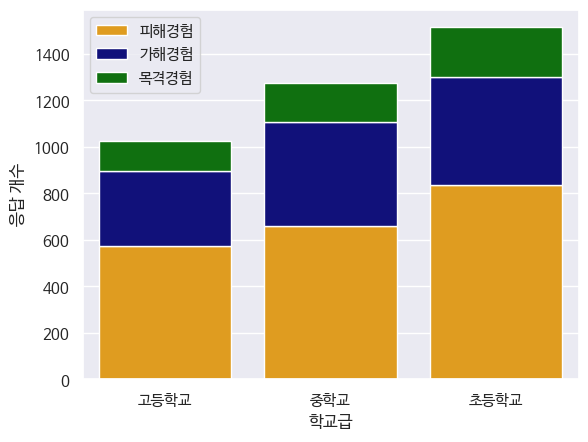

In [ ]:
#한글폰트 설정

plt.rc('font', family='NanumBarunGothic')
sns.set(font="NanumBarunGothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')        

# 막대그래프 그리기
ax = sns.barplot(data=grouped_df, x='학교급', y='피해경험', label='피해경험', color='orange')
ax = sns.barplot(data=grouped_df, x='학교급', y='가해경험', bottom=grouped_df['피해경험'], label='가해경험',color = 'darkblue')
ax = sns.barplot(data=grouped_df, x='학교급', y='목격경험', bottom=grouped_df['피해경험'] + grouped_df['가해경험'], label='목격경험', color = 'green')

ax.legend()

ax.set(xlabel='학교급', ylabel='응답 개수')

plt.show()

## 1-1. 초중고별 피해 유형 분석 - 빈도수


In [ ]:
#누구에게 피해를 당했는가? Q8_1 : 아는사람(1), 모르는사람(2)
df['Q8_1'].value_counts()

1.0    1066
2.0    1001
Name: Q8_1, dtype: int64

In [ ]:
#### 피해경험 -> 빈도수 별로 유형 분석(1 ~2는 가끔, 3~5는 자주 )

#질문별 응답 -> 가끔, 자주로 나누어 분석
def label(value):
    if 1 <= value <= 2:
        return '가끔'
    elif 3 <= value <= 5:
        return '자주'
    else:
        return '무응답'


def analyze_frequency(df,school = "전체"):
    tmp = df.loc[df['피해경험'] == 1,['Q8a_1', 'Q8a_2', 'Q8a_3', 'Q8a_4', 'Q8a_5', 'Q8a_6', 'Q8a_7', 'Q8a_8']]
    labelled_df = tmp.applymap(label)
    melted_df = labelled_df.melt(var_name='Question', value_name='Frequency')   # melt() 함수 알아두기!
    melted_df = melted_df[melted_df['Frequency'] != '무응답']

    total_counts = melted_df.groupby('Question').size().reset_index(name='count')

    plt.figure(figsize=(8, 5))
    ax = sns.countplot(data=melted_df, x='Question', hue='Frequency', palette=['orange', 'blue'])

    ax.plot(np.arange(len(total_counts)), total_counts['count'], marker='o', linestyle='-', label='전체 데이터 수', color='red')

    ax.legend()
    ax.set(xlabel='질문', ylabel='응답 개수')
    ax.set_title(f"[{school}] 피해 유형별 빈도수")
    plt.show()

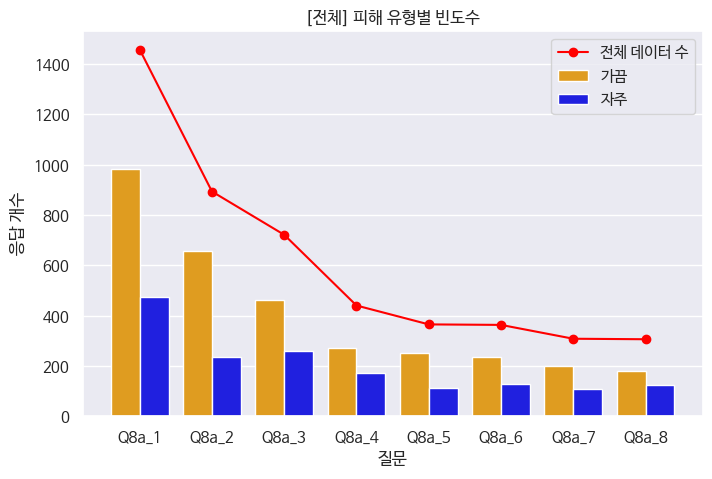

In [ ]:
# 전체
analyze_frequency(df_have_exp, '전체')

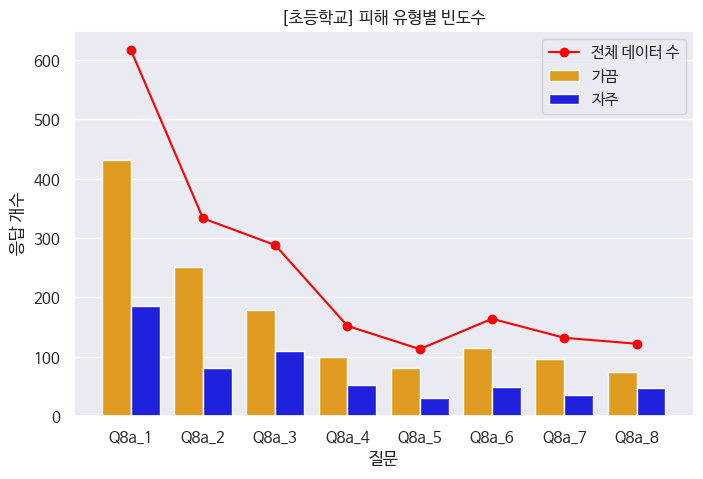

In [ ]:
# 초등학생 - Q8a_6) 사이버불링(대화 참여하지 못하게 왕따 or 퇴장하지 못하게 막고 놀리거나 욕함)
analyze_frequency(df_have_exp.loc[df_have_exp['학교급'] == '초등학교'], '초등학교')

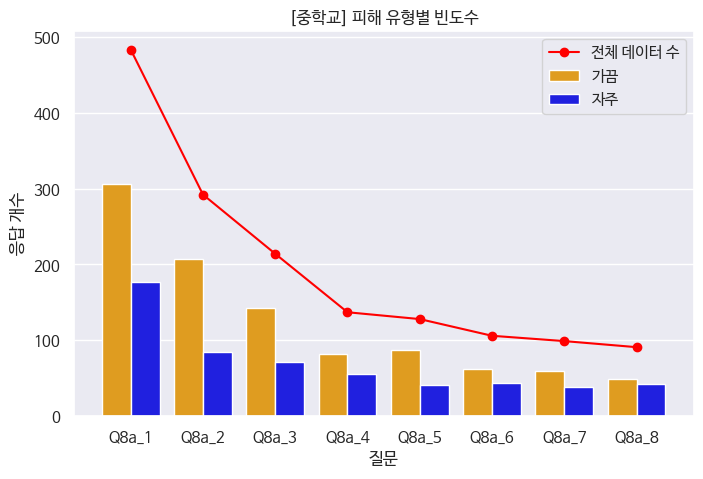

In [ ]:
# 중학생
analyze_frequency(df_have_exp.loc[df_have_exp['학교급'] == '중학교'], '중학교')

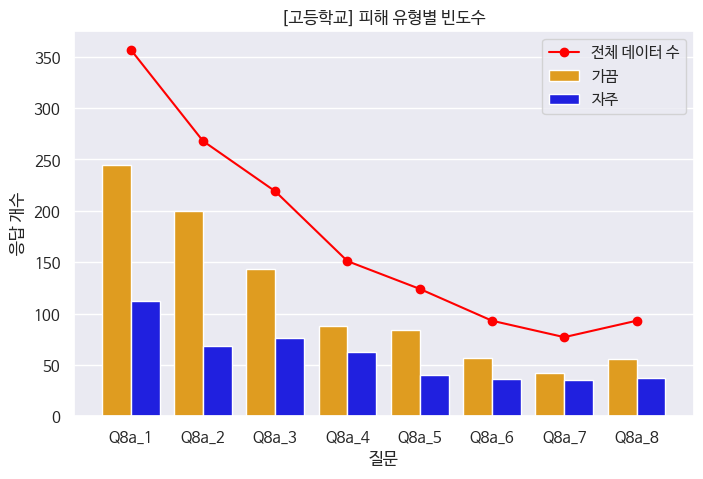

In [ ]:
# 고등학생
analyze_frequency(df_have_exp.loc[df_have_exp['학교급'] == '고등학교'], '고등학교')

In [ ]:

tmp = df_have_exp.loc[df_have_exp['피해경험'] == 1,['Q8a_1', 'Q8a_2', 'Q8a_3', 'Q8a_4', 'Q8a_5', 'Q8a_6', 'Q8a_7', 'Q8a_8']]
tmp

,Q8a_1,Q8a_2,Q8a_3,Q8a_4,Q8a_5,Q8a_6,Q8a_7,Q8a_8
42,1,1,9,9,9,9,9,1
46,2,2,9,9,9,9,9,9
57,1,1,9,9,9,9,9,9
61,9,1,9,9,9,9,9,9
65,1,9,4,1,9,1,9,9
...,...,...,...,...,...,...,...,...
8966,2,9,9,9,9,9,9,9
8972,2,1,9,9,9,9,9,9
8976,4,9,9,9,9,9,9,9
8991,9,9,9,9,9,3,9,9


In [ ]:
labelled_df = tmp.applymap(label)
labelled_df

,Q8a_1,Q8a_2,Q8a_3,Q8a_4,Q8a_5,Q8a_6,Q8a_7,Q8a_8
42,가끔,가끔,무응답,무응답,무응답,무응답,무응답,가끔
46,가끔,가끔,무응답,무응답,무응답,무응답,무응답,무응답
57,가끔,가끔,무응답,무응답,무응답,무응답,무응답,무응답
61,무응답,가끔,무응답,무응답,무응답,무응답,무응답,무응답
65,가끔,무응답,자주,가끔,무응답,가끔,무응답,무응답
...,...,...,...,...,...,...,...,...
8966,가끔,무응답,무응답,무응답,무응답,무응답,무응답,무응답
8972,가끔,가끔,무응답,무응답,무응답,무응답,무응답,무응답
8976,자주,무응답,무응답,무응답,무응답,무응답,무응답,무응답
8991,무응답,무응답,무응답,무응답,무응답,자주,무응답,무응답


In [ ]:
melted_df = labelled_df.melt(var_name='Question', value_name='Frequency')
melted_df = melted_df[melted_df['Frequency'] != '무응답']

In [ ]:
melted_df

,Question,Frequency
0,Q8a_1,가끔
1,Q8a_1,가끔
2,Q8a_1,가끔
4,Q8a_1,가끔
5,Q8a_1,가끔
...,...,...
16518,Q8a_8,가끔
16525,Q8a_8,자주
16526,Q8a_8,자주
16529,Q8a_8,자주


## 1-2. 초중고별 피해 유형별 분석 - 가해자 유형 (아는사람, 모르는사람)


In [ ]:
# 피해경험 -> 아는사람, 모르는 사람 별로 유형 분석

# 전체 피해자 -> 1 = 아는사람, 2 = 모르는 사람      (거의 비슷함)
df_have_exp.loc[df_have_exp['피해경험']==1,'Q8_1'].value_counts()

1.0    1066
2.0    1001
Name: Q8_1, dtype: int64

In [ ]:
#초중고별 by 아는사람/모르는사람 피해 비율 -> 거의 반반
p_df = df_have_exp.loc[df_have_exp['피해경험']==1]
print("====================초등학교====================")
print(p_df.loc[p_df['학교급']=='초등학교','Q8_1'].value_counts())

print("====================중학교====================")
print(p_df.loc[p_df['학교급']=='중학교','Q8_1'].value_counts())

print("====================고등학교====================")
print(p_df.loc[p_df['학교급']=='고등학교','Q8_1'].value_counts())

====================초등학교====================
1.0    425
2.0    410
Name: Q8_1, dtype: int64
====================중학교====================
1.0    341
2.0    317
Name: Q8_1, dtype: int64
====================고등학교====================
1.0    300
2.0    274
Name: Q8_1, dtype: int64


In [ ]:
#### 피해경험 -> 아는사람, 모르는 사람 별로 유형 분석 

def analyze_whodid(df,whodid,school = "전체"):
    #빈도수에 따른 가중치 부여 해보기..?
    tmp = df.loc[df['피해경험'] == 1,['Q8a_1', 'Q8a_2', 'Q8a_3', 'Q8a_4', 'Q8a_5', 'Q8a_6', 'Q8a_7', 'Q8a_8']]
    melted_df = tmp.melt(var_name='Question', value_name='answer')   # melt() 함수 알아두기!
    melted_df = melted_df.loc[melted_df['answer'] != 9]
    total_counts = melted_df.groupby('Question').size().reset_index(name='count')

    plt.figure(figsize=(6, 4))
    ax = sns.countplot(data=melted_df, x='Question')
    # non_null_counts = tmp.notnull().sum()
    # non_null_counts.plot(kind='bar', ax=ax)           #<-- 막대그래프로 표시할 때
    # ax = plt.pie(non_null_counts, labels=non_null_counts.index, autopct='%.1f%%', pctdistance = 0.8)    # 파이차트

    ax.set(xlabel='질문', ylabel='응답 개수')
    ax.set_title(f"[{school}] {whodid} - 피해유형 ")

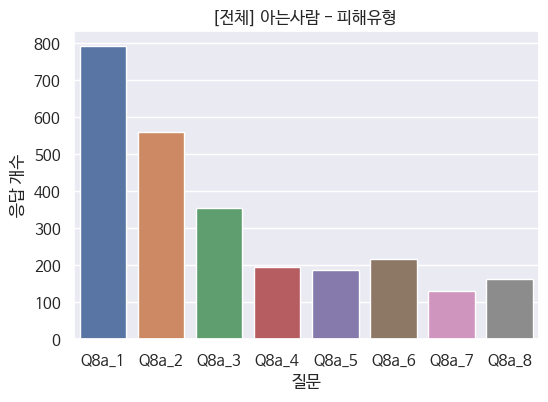

In [ ]:
# 전체 피해경험자 중 아는사람 - 피해유형 분석 (파이차트로 비율로 그리면 더 좋을 수도 있을듯 ㅠ)

analyze_whodid(df_have_exp.loc[df_have_exp['Q8_1'] == 1.0],'아는사람')

- 아는사람 : 1,2,3,6,4,5,8,7
- 모르는사람 :1,3,2,4,7,5,6,8

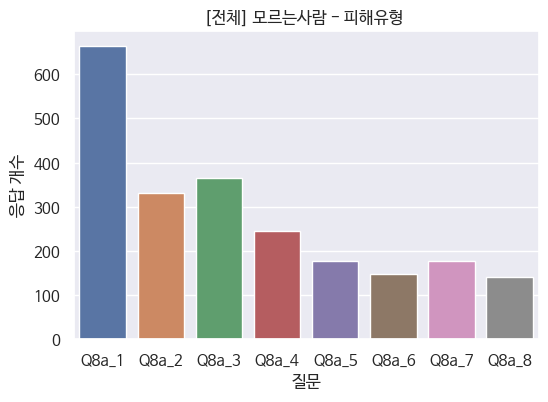

In [ ]:
# 전체 피해경험자 중 모르는 사람 
#8Qa_3) 누군가 내가 싫어하는데도 이메일이나 쪽지를 꼐속보내거나 sns에 계속 방문에 글이나 사진을 남김

analyze_whodid(df_have_exp.loc[df_have_exp['Q8_1'] == 2.0],'모르는사람')

<ipython-input-43-6e8431d01d0a>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,2)


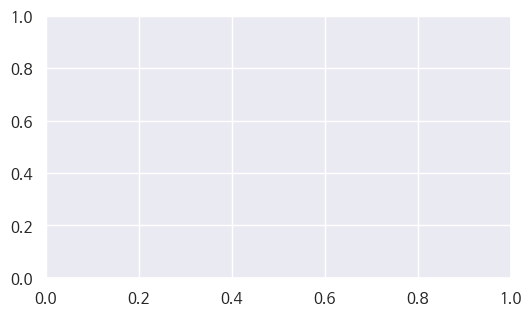

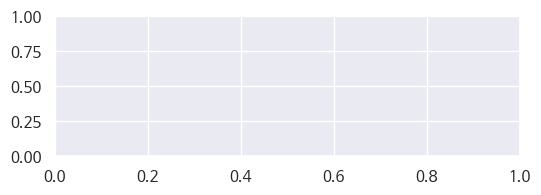

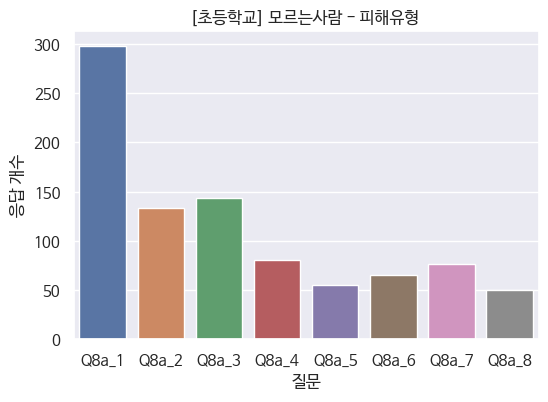

In [ ]:
# 초등학생  - 아는사람으로 부터 피해
plt.figure(figsize =(6,8) )
plt.subplots_adjust(hspace=0.35)    # 서브플롯간 간격조정
plt.subplot(2,1,1)
analyze_whodid(df_have_exp.loc[(df_have_exp['Q8_1'] == 1.0 ) & (df_have_exp['학교급']=='초등학교')],'아는사람', '초등학교')
plt.subplot(2,1,2)
analyze_whodid(df_have_exp.loc[(df_have_exp['Q8_1'] == 2.0 ) & (df_have_exp['학교급']=='초등학교')],'모르는사람', '초등학교')
plt.show()

<ipython-input-44-0821a1092ac8>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,2)


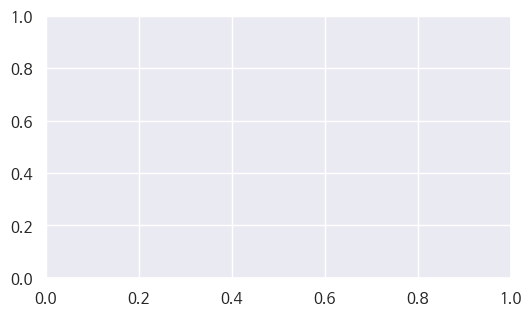

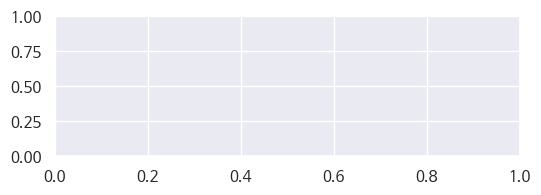

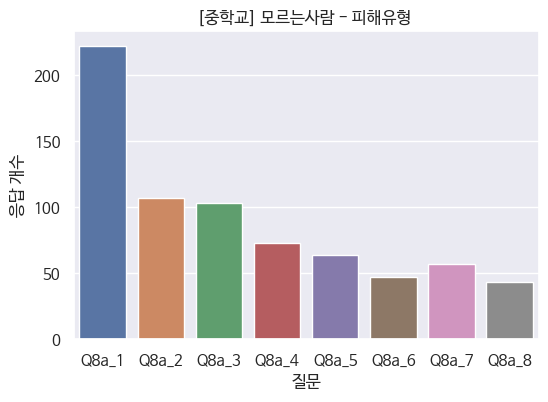

In [ ]:
# 중학생  - 아는사람으로 부터 피해
plt.figure(figsize =(6,8) )
plt.subplots_adjust(hspace=0.35)    # 서브플롯간 간격조정
plt.subplot(2,1,1)
analyze_whodid(df_have_exp.loc[(df_have_exp['Q8_1'] == 1.0 ) & (df_have_exp['학교급']=='중학교')],'아는사람', '중학교')
plt.subplot(2,1,2)
analyze_whodid(df_have_exp.loc[(df_have_exp['Q8_1'] == 2.0 ) & (df_have_exp['학교급']=='중학교')],'모르는사람', '중학교')
plt.show()

<ipython-input-45-4058375b006f>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,2)


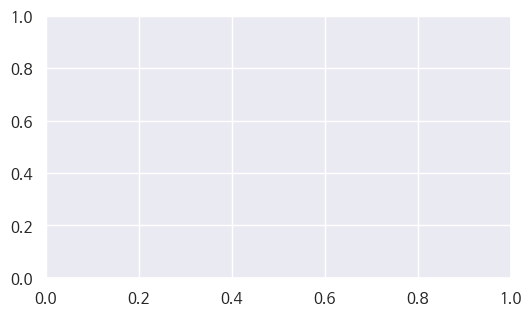

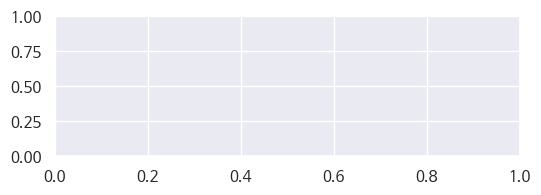

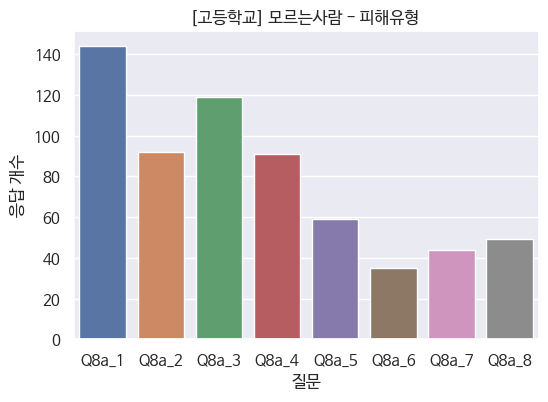

In [ ]:
# 고등학교  - 모르는사람으로 부터 피해
plt.figure(figsize =(6,8) )
plt.subplots_adjust(hspace=0.35)    # 서브플롯간 간격조정
plt.subplot(2,1,1)
analyze_whodid(df_have_exp.loc[(df_have_exp['Q8_1'] == 1.0 ) & (df_have_exp['학교급']=='고등학교')],'아는사람', '고등학교')
plt.subplot(2,1,2)
analyze_whodid(df_have_exp.loc[(df_have_exp['Q8_1'] == 2.0 ) & (df_have_exp['학교급']=='고등학교')],'모르는사람', '고등학교')
plt.show()

### 초중고 별 가해,피해,목격 경험, 경험없음 사람들 인터넷 사용빈도 분석

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!
from sklearn.metrics import matthews_corrcoef
import scipy.stats as spst

In [ ]:
df.head()

,시도,행정구역분류,학교급,학교세부유형,남녀공학구분,지역규모,ck1,SQ2b_1,SQ2b_2,SQ3a,...,A_5,A_6,A_7,A_8,A_7_etc,C,D,피해경험,가해경험,목격경험
0,서울,11-11140,초등학교,초등학교,NaN,특별/광역시,1,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,5,4,0,0,0
1,서울,11-11140,초등학교,초등학교,NaN,특별/광역시,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4,5,0,0,0
2,서울,11-11140,초등학교,초등학교,NaN,특별/광역시,1,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,6,5,0,0,0
3,서울,11-11140,초등학교,초등학교,NaN,특별/광역시,1,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,5,4,0,0,0
4,서울,11-11140,초등학교,초등학교,NaN,특별/광역시,1,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,4,4,0,0,0


In [ ]:
def use_freq(df):
    exp_p = df.loc[df['피해경험']==1]
    exp_g = df.loc[df['가해경험']==1]
    exp_m = df.loc[df['목격경험']==1]
    exp_no = df.loc[(df['피해경험']==0) & (df['목격경험']==0) & (df['가해경험']==0)]    #아무경험 없음
    print(exp_p.shape, exp_g.shape, exp_m.shape, exp_no.shape)
    # 경험별 인터넷 이용시간 평균
    mean_p = exp_p['Q1'].mean()
    mean_g = exp_g['Q1'].mean()
    mean_m = exp_m['Q1'].mean()
    mean_no = exp_no['Q1'].mean()
    print("피해경험 인터넷이용평균 : ",mean_p)
    print("가해경험 인터넷이용평균 : ",mean_g)
    print("목격경험 인터넷이용평균 : ",mean_m)
    print("무경험 인터넷이용평균 : ",mean_no)

    print("=============================================================")

    #카이제곱검정, 시각화
    for target in ['피해경험', '가해경험', '목격경험']:
        temp = pd.crosstab(df['Q1'],df[target], normalize = 'columns')
        print(spst.chi2_contingency(temp))
        display(temp)
        temp.plot(kind = 'line',marker = 'o')
        plt.show()

        a = df[target].values
        b = df['Q1'].values
        print('두 범주형 변수 간 상관계수 : ',round(matthews_corrcoef(b,a),3))
        # print('두 범주형 변수 간 상관계수 : ',spst.pointbiserialr(b,a))



(2067, 231) (1236, 231) (512, 231) (6143, 231)
피해경험 인터넷이용평균 :  3.560716013546202
가해경험 인터넷이용평균 :  3.588187702265372
목격경험 인터넷이용평균 :  3.2890625
무경험 인터넷이용평균 :  3.34331759726518
Chi2ContingencyResult(statistic=0.014810891456846696, pvalue=0.9999985874458845, dof=5, expected_freq=array([[0.07284053, 0.07284053],
       [0.2371664 , 0.2371664 ],
       [0.26569765, 0.26569765],
       [0.17354199, 0.17354199],
       [0.09453927, 0.09453927],
       [0.15621416, 0.15621416]]))


피해경험,0,1
Q1,,
1,0.087626,0.058055
2,0.258561,0.215772
3,0.261439,0.269956
4,0.159856,0.187228
5,0.087482,0.101597
6,0.145036,0.167392


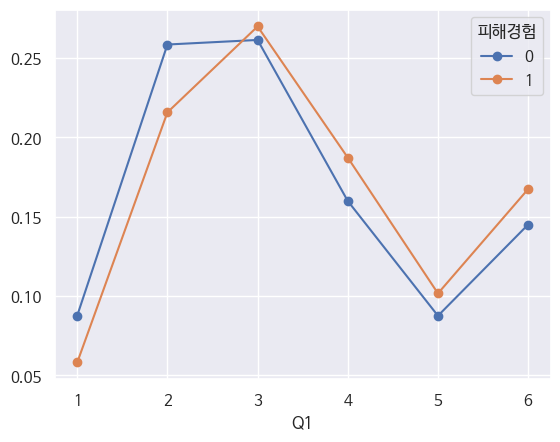

두 범주형 변수 간 상관계수 :  -0.01
Chi2ContingencyResult(statistic=0.013979302200125956, pvalue=0.999998777089271, dof=5, expected_freq=array([[0.07032362, 0.07032362],
       [0.23600649, 0.23600649],
       [0.26456472, 0.26456472],
       [0.17316151, 0.17316151],
       [0.09237572, 0.09237572],
       [0.16356793, 0.16356793]]))


가해경험,0,1
Q1,,
1,0.084822,0.055825
2,0.253566,0.218447
3,0.262948,0.266181
4,0.163475,0.182848
5,0.090091,0.094660
6,0.145097,0.182039


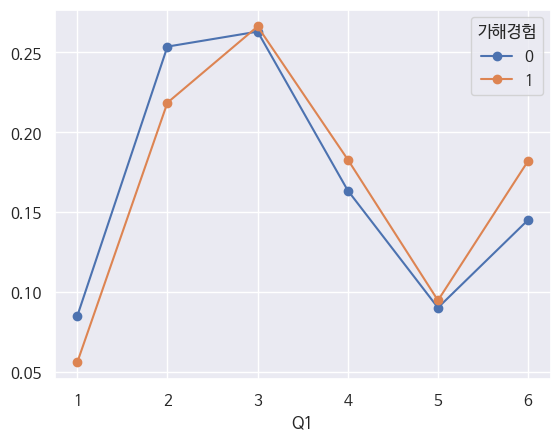

두 범주형 변수 간 상관계수 :  -0.008
Chi2ContingencyResult(statistic=0.0067627789560654955, pvalue=0.9999998004218675, dof=5, expected_freq=array([[0.07956808, 0.07956808],
       [0.25484527, 0.25484527],
       [0.27820756, 0.27820756],
       [0.16332327, 0.16332327],
       [0.08021143, 0.08021143],
       [0.14384438, 0.14384438]]))


목격경험,0,1
Q1,,
1,0.081011,0.078125
2,0.247972,0.261719
3,0.261493,0.294922
4,0.166490,0.160156
5,0.092063,0.068359
6,0.150970,0.136719


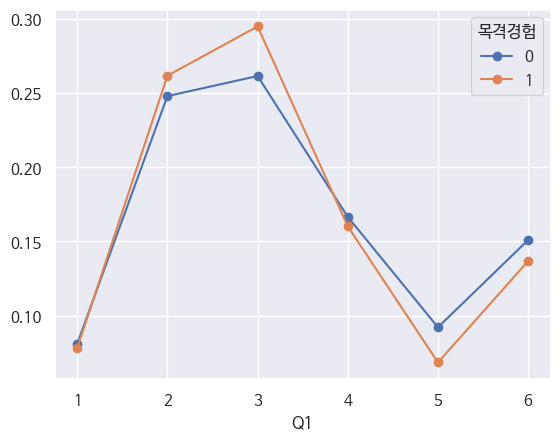

두 범주형 변수 간 상관계수 :  -0.001


In [ ]:
use_freq(df)

(835, 231) (467, 231) (212, 231) (1868, 231)
피해경험 인터넷이용평균 :  3.3700598802395207
가해경험 인터넷이용평균 :  3.387580299785867
목격경험 인터넷이용평균 :  3.108490566037736
무경험 인터넷이용평균 :  2.880085653104925
Chi2ContingencyResult(statistic=0.055328037357797434, pvalue=0.9999624475871248, dof=5, expected_freq=array([[0.11591202, 0.11591202],
       [0.28262537, 0.28262537],
       [0.26055224, 0.26055224],
       [0.14927764, 0.14927764],
       [0.08076265, 0.08076265],
       [0.11087008, 0.11087008]]))


피해경험,0,1
Q1,,
1,0.142004,0.089820
2,0.328125,0.237126
3,0.256434,0.264671
4,0.127298,0.171257
5,0.065717,0.095808
6,0.080423,0.141317


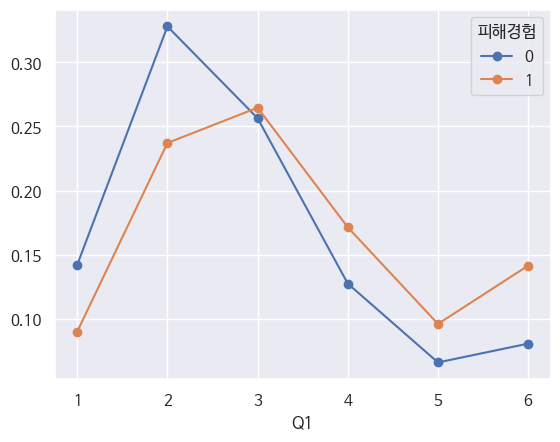

두 범주형 변수 간 상관계수 :  -0.019
Chi2ContingencyResult(statistic=0.05133919169293511, pvalue=0.9999688100346228, dof=5, expected_freq=array([[0.106066  , 0.106066  ],
       [0.2867624 , 0.2867624 ],
       [0.26499308, 0.26499308],
       [0.14111341, 0.14111341],
       [0.07442292, 0.07442292],
       [0.12664219, 0.12664219]]))


가해경험,0,1
Q1,,
1,0.137186,0.074946
2,0.310142,0.263383
3,0.255896,0.274090
4,0.138758,0.143469
5,0.073899,0.074946
6,0.084119,0.169165


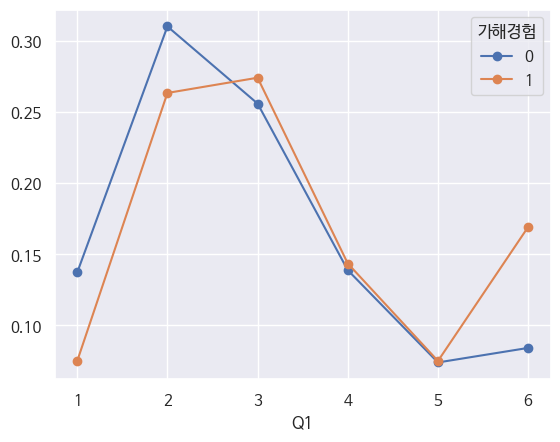

두 범주형 변수 간 상관계수 :  -0.018
Chi2ContingencyResult(statistic=0.00920923687911951, pvalue=0.9999995685010721, dof=5, expected_freq=array([[0.12309231, 0.12309231],
       [0.28934694, 0.28934694],
       [0.26558845, 0.26558845],
       [0.15132173, 0.15132173],
       [0.06599392, 0.06599392],
       [0.10465665, 0.10465665]]))


목격경험,0,1
Q1,,
1,0.128260,0.117925
2,0.305109,0.273585
3,0.257592,0.273585
4,0.137549,0.165094
5,0.075384,0.056604
6,0.096106,0.113208


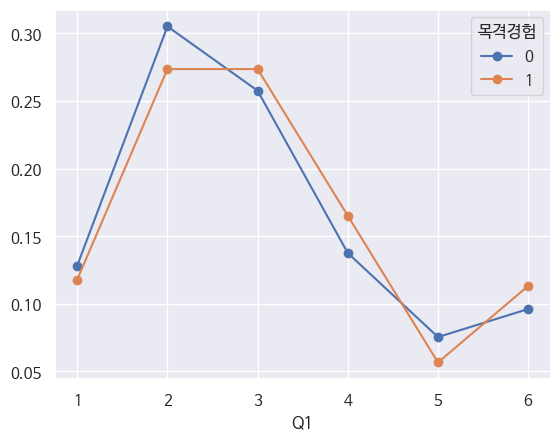

두 범주형 변수 간 상관계수 :  -0.002


In [ ]:
#초등학생 
use_freq(df.loc[df['학교급']=='초등학교'])

(658, 231) (448, 231) (169, 231) (2098, 231)
피해경험 인터넷이용평균 :  3.898176291793313
가해경험 인터넷이용평균 :  3.7879464285714284
목격경험 인터넷이용평균 :  3.7041420118343193
무경험 인터넷이용평균 :  3.607721639656816
Chi2ContingencyResult(statistic=0.029108903274186953, pvalue=0.9999923897213956, dof=5, expected_freq=array([[0.04426097, 0.04426097],
       [0.17513771, 0.17513771],
       [0.27140367, 0.27140367],
       [0.2010261 , 0.2010261 ],
       [0.11031853, 0.11031853],
       [0.19785302, 0.19785302]]))


피해경험,0,1
Q1,,
1,0.052048,0.036474
2,0.215017,0.135258
3,0.266212,0.276596
4,0.184727,0.217325
5,0.106655,0.113982
6,0.175341,0.220365


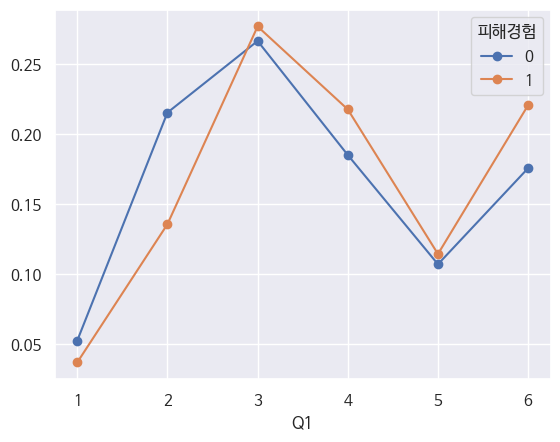

두 범주형 변수 간 상관계수 :  -0.005
Chi2ContingencyResult(statistic=0.024608809689010455, pvalue=0.9999949908981774, dof=5, expected_freq=array([[0.04882922, 0.04882922],
       [0.17591191, 0.17591191],
       [0.26270591, 0.26270591],
       [0.2185988 , 0.2185988 ],
       [0.10872039, 0.10872039],
       [0.18523377, 0.18523377]]))


가해경험,0,1
Q1,,
1,0.048551,0.049107
2,0.206735,0.145089
3,0.270948,0.254464
4,0.180501,0.256696
5,0.108066,0.109375
6,0.185200,0.185268


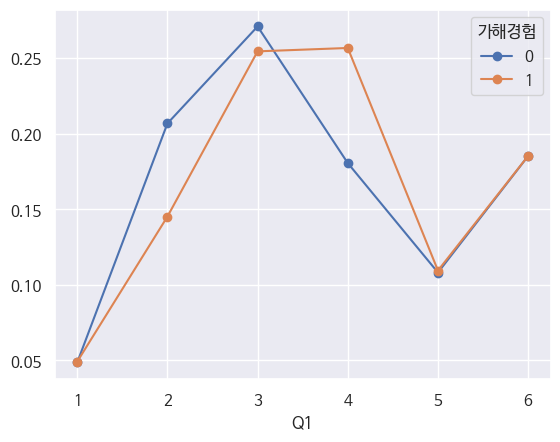

두 범주형 변수 간 상관계수 :  0.0
Chi2ContingencyResult(statistic=0.019384019185905432, pvalue=0.9999972365427929, dof=5, expected_freq=array([[0.03689609, 0.03689609],
       [0.19925038, 0.19925038],
       [0.28970272, 0.28970272],
       [0.17399332, 0.17399332],
       [0.11578355, 0.11578355],
       [0.18437394, 0.18437394]]))


목격경험,0,1
Q1,,
1,0.050124,0.023669
2,0.197317,0.201183
3,0.265796,0.313609
4,0.194140,0.153846
5,0.107307,0.124260
6,0.185316,0.183432


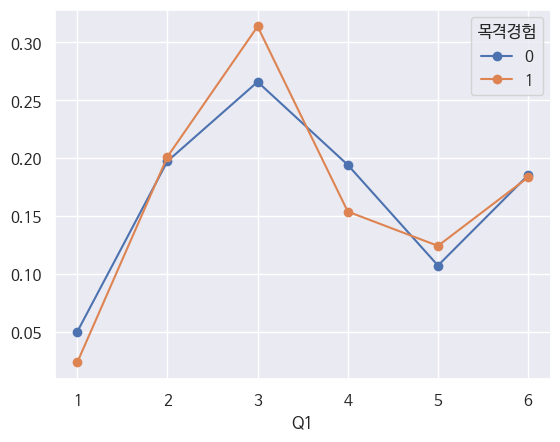

두 범주형 변수 간 상관계수 :  -0.005


In [ ]:
#중학생 
use_freq(df.loc[df['학교급']=='중학교'])

(574, 231) (321, 231) (131, 231) (2177, 231)
피해경험 인터넷이용평균 :  3.451219512195122
가해경험 인터넷이용평균 :  3.601246105919003
목격경험 인터넷이용평균 :  3.045801526717557
무경험 인터넷이용평균 :  3.485989894350023
Chi2ContingencyResult(statistic=0.018591479702649558, pvalue=0.9999975097043431, dof=5, expected_freq=array([[0.0549182 , 0.0549182 ],
       [0.25763754, 0.25763754],
       [0.26567586, 0.26567586],
       [0.17048938, 0.17048938],
       [0.09214809, 0.09214809],
       [0.15913093, 0.15913093]]))


피해경험,0,1
Q1,,
1,0.073251,0.036585
2,0.238272,0.277003
3,0.261317,0.270035
4,0.165021,0.175958
5,0.088477,0.095819
6,0.173663,0.144599


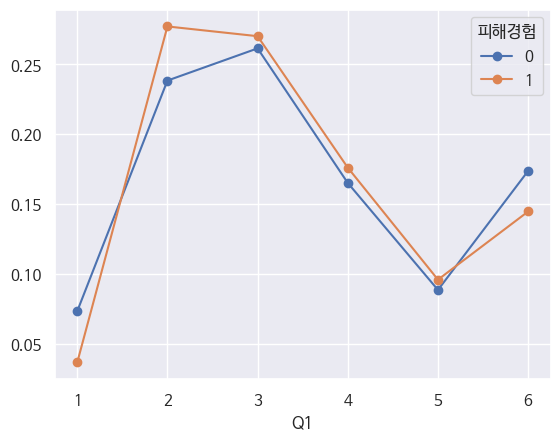

두 범주형 변수 간 상관계수 :  -0.011
Chi2ContingencyResult(statistic=0.01766690405702881, pvalue=0.9999978071422029, dof=5, expected_freq=array([[0.05354064, 0.05354064],
       [0.24997707, 0.24997707],
       [0.26652408, 0.26652408],
       [0.15388804, 0.15388804],
       [0.09556885, 0.09556885],
       [0.18050132, 0.18050132]]))


가해경험,0,1
Q1,,
1,0.069698,0.037383
2,0.244502,0.255452
3,0.262020,0.271028
4,0.170704,0.137072
5,0.088334,0.102804
6,0.164741,0.196262


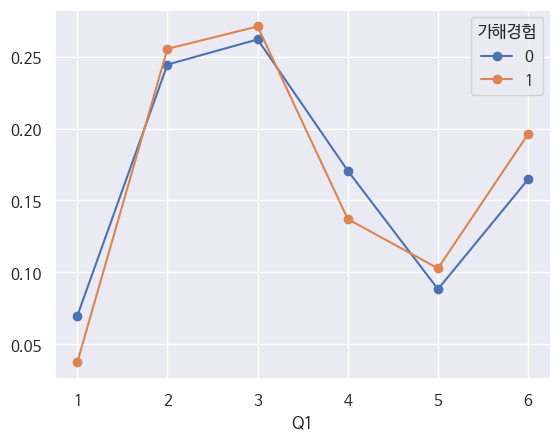

두 범주형 변수 간 상관계수 :  -0.008
Chi2ContingencyResult(statistic=0.08391532758671219, pvalue=0.999894693855779, dof=5, expected_freq=array([[0.07470315, 0.07470315],
       [0.28143308, 0.28143308],
       [0.28319734, 0.28319734],
       [0.16386308, 0.16386308],
       [0.05427473, 0.05427473],
       [0.14252862, 0.14252862]]))


목격경험,0,1
Q1,,
1,0.065437,0.083969
2,0.242255,0.320611
3,0.261051,0.305344
4,0.167421,0.160305
5,0.093282,0.015267
6,0.170553,0.114504


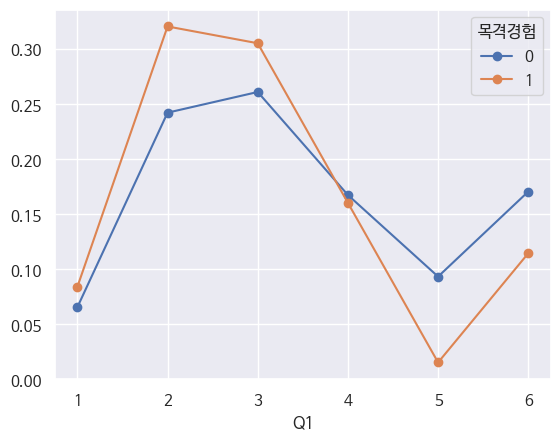

두 범주형 변수 간 상관계수 :  0.003


In [ ]:
#고등학생 
use_freq(df.loc[df['학교급']=='고등학교'])

## 1-4.초중고 피해 유형별 피해경로(어떤 서비스매체)


In [ ]:
# 초중고 피해 유형별 서비스 매체
# 피해 경험 1 -> Q_8_1 의 피해 경험 있음을 1컬럼으로 추가 -> Q8_4_1~7 중 어떤 서비스로 단변량 분석, 이변량 분석?
pd.set_option('display.max_columns', None) 
df_have_exp.tail(2)

,시도,행정구역분류,학교급,학교세부유형,남녀공학구분,지역규모,ck1,SQ2b_1,SQ2b_2,SQ3a,SQ3b_1,SQ5,Q1,Q2_1,Q2_2,Q2_3,Q3,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q4_6,Q4_7,Q4_8,Q5_1,Q5_2,Q5_3,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_1a,Q6_1a_6_etc,Q7,Q7a,Q7_1_1,Q7_1_2,Q7_1_3,Q7_1_4,Q7_1_5,Q7_1_6,Q7_1_7,Q7_1_8,Q7_2_1,Q7_2_2,Q7_2_3,Q7_2_4,Q7_2_5,Q7_2_6,Q7_3,Q8a_1,Q8a_2,Q8a_3,Q8a_4,Q8a_5,Q8a_6,Q8a_7,Q8a_8,Q8_1,Q8_1a_1,Q8_1a_2,Q8_1a_3,Q8_1a_4,Q8_1a_5,Q8_2,Q8_3,Q8_4_1,Q8_4_2,Q8_4_3,Q8_4_4,Q8_4_5,Q8_4_6,Q8_4_7,Q8_4_7_etc,Q8_5_1,Q8_5_2,Q8_5_3,Q8_5_4,Q8_5_5,Q8_5_6,Q8_5_6_etc,Q8_6_1,Q8_6_2,Q8_6_3,Q8_6_4,Q8_6_5,Q8_6_6,Q8_7_1,Q8_7_2,Q8_7_3,Q8_7_4,Q8_7_5,Q8_7_6,Q8_7_7,Q8_7_8,Q8_8,Q8_8_6_etc,Q8_9_1,Q8_9_2,Q8_9_3,Q8_9_4,Q8_9_5,Q8_9_6,Q8_9_7,Q9a_1,Q9a_2,Q9a_3,Q9a_4,Q9a_5,Q9a_6,Q9a_7,Q9a_8,Q9_1,Q9_1a_1,Q9_1a_2,Q9_1a_3,Q9_1a_4,Q9_1a_5,Q9_2,Q9_3_1,Q9_3_2,Q9_3_3,Q9_3_4,Q9_3_5,Q9_3_6,Q9_3_7,Q9_3_7_etc,Q9_4_1,Q9_4_2,Q9_4_3,Q9_4_4,Q9_4_5,Q9_4_6,Q9_5_1,Q9_5_2,Q9_5_3,Q9_5_4,Q9_5_5,Q9_6_1,Q9_6_2,Q9_6_3,Q9_6_4,Q9_6_5,Q9_7,Q10_1,Q10_2,Q10_3,Q10_4,Q10_5,Q10_6,Q10_7,Q10_8,Q10_9,Q10_10,Q10_11,Q10_12,Q11_1,Q11_2,Q11_3,Q12_1,Q12_2,Q12_3,Q13_1,Q13_2,Q13_3,Q13_4,Q13_5,Q14_1,Q14_2,Q14_3,Q14_4,Q14_5,Q14_6,Q15,Q15_1_1,Q15_1_2,Q15_1_3,Q15_1_4,Q15_1_4_etc,Q15_2,Q15_3,Q16,Q16_1_1,Q16_1_2,Q16_1_3,Q16_1_4,Q16_1_5,Q16_1_6,Q17,Q18_1,Q18_2,Q18_3,Q19_1,Q19_2,Q19_3,Q19_4,Q19_5,Q19_6,Q20_1,Q20_2,Q20_3,Q20_4,Q20_5,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q22_1,Q22_2,Q22_3,Q23_1,Q23_2,Q23_3,Q24,A_1,A_2,A_3,A_4,A_5,A_6,A_7,A_8,A_7_etc,C,D,피해경험,가해경험,목격경험
9005,경북,37-37050,고등학교,가사고등학교,남여공학,면지역,3,NaN,NaN,4.0,3.0,2,4,2,6,4,1,4,4,4,4,4,4,4,4,5,8,2,9,9,9,9,9,NaN,NaN,1,3.0,NaN,NaN,NaN,NaN,5.0,NaN,7.0,8.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,9,9,9,9,9,9,9,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,9,9,9,9,9,9,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,9,9,9,9,9,9,9,9,9,9,9,9,4,4,4,4,4,4,NaN,2.0,3.0,NaN,NaN,NaN,2.0,3.0,NaN,5.0,NaN,1,NaN,2.0,NaN,NaN,NaN,4.0,4,1,NaN,2.0,NaN,NaN,5.0,NaN,1,3,3,3,3,3,3,3,3,3,9,9,9,9,9,4,4,4,4,4,1,4,5,2,4,5,4,NaN,2.0,3.0,4.0,5.0,NaN,NaN,NaN,NaN,7,4,0,0,1
9011,경북,37-37050,고등학교,가사고등학교,남여공학,면지역,3,NaN,NaN,4.0,3.0,2,2,2,4,5,4,4,4,4,4,4,4,4,4,2,5,6,9,3,1,2,1,5.0,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,1,9,9,9,9,9,1.0,NaN,2.0,NaN,4.0,NaN,5.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,3.0,NaN,1.0,1.0,1.0,3.0,3.0,2.0,3.0,9,9,9,9,9,9,9,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,9,9,9,9,9,9,9,9,9,9,9,9,3,3,3,3,3,3,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,4.0,NaN,NaN,1,1.0,2.0,NaN,NaN,NaN,3.0,4,2,NaN,NaN,NaN,NaN,NaN,NaN,2,3,3,1,3,4,4,1,1,1,9,2,9,9,9,4,4,4,4,4,2,3,4,3,2,1,2,NaN,NaN,3.0,4.0,5.0,NaN,NaN,NaN,NaN,3,4,1,0,0


In [ ]:
df_have_exp.shape

(2874, 231)

In [ ]:
type_dict = {
    'Q8a_1': '언어폭력(1)',
    'Q8a_2': '명예훼손(2)',
    'Q8a_3': '스토킹(3)',
    'Q8a_4': '성폭력(4)',
    'Q8a_5': '신상정보유출(5)',
    'Q8a_6': '사이버따돌림(6)',
    'Q8a_7': '사이버갈취(7)',
    'Q8a_8': '사이버강요(8)'
}
service_dict = {
    'Q8_4_1':'문자/인스턴트 메세지(카톡)',
    'Q8_4_2':'커뮤니티 동호회(카페,클럽)',
    'Q8_4_3': 'SNS',
    'Q8_4_4': '개인홈페이지',
    'Q8_4_5': '이메일',
    'Q8_4_6': '온라인 게임',
    'Q8_4_7': '기타'

}

In [ ]:
def analyze_service(df_have_exp,age):
    i = 1
    plt.figure(figsize = (16,12))
    plt.subplots_adjust(hspace = 0.5)
    plt.suptitle(f'<{age}>')
    for p_type in ['Q8a_1', 'Q8a_2', 'Q8a_3', 'Q8a_4', 'Q8a_5', 'Q8a_6', 'Q8a_7','Q8a_8']:
        
        exp_p = df_have_exp.loc[(df_have_exp['피해경험']==1) & (df_have_exp[p_type]<=5)].copy()
        # Q8_4_1~8_4_7 -> 어떤 서비스?
        temp = exp_p.loc[:, ['Q8_4_1','Q8_4_2','Q8_4_3','Q8_4_4','Q8_4_5','Q8_4_6','Q8_4_7']]
        melted_df = temp.melt(var_name = 'Question', value_name = 'answer')
        melted_df = melted_df.dropna()
        
        plt.subplot(3,3,i)
        ax = sns.countplot(data = melted_df, x = 'Question')
        ax.set(xlabel = '피해 경험 경로', ylabel = '응답개수' )
        ax.set_title(f'{type_dict[p_type]} - 피해 경험 경로 ')
        plt.xticks(rotation=45)
        i+=1
    plt.show()


In [ ]:
# exp_p['p_type1'] = exp_p.apply(lambda x : 1 if x['Q8a_1'] <= 5 else 0, axis = 1)
# exp_p['p_type2'] = exp_p.apply(lambda x : 1 if x['Q8a_2'] <= 5 else 0, axis = 1)
# exp_p['p_type3'] = exp_p.apply(lambda x : 1 if x['Q8a_3'] <= 5 else 0, axis = 1)
# exp_p['p_type4'] = exp_p.apply(lambda x : 1 if x['Q8a_4'] <= 5 else 0, axis = 1)
# exp_p['p_type5'] = exp_p.apply(lambda x : 1 if x['Q8a_5'] <= 5 else 0, axis = 1)

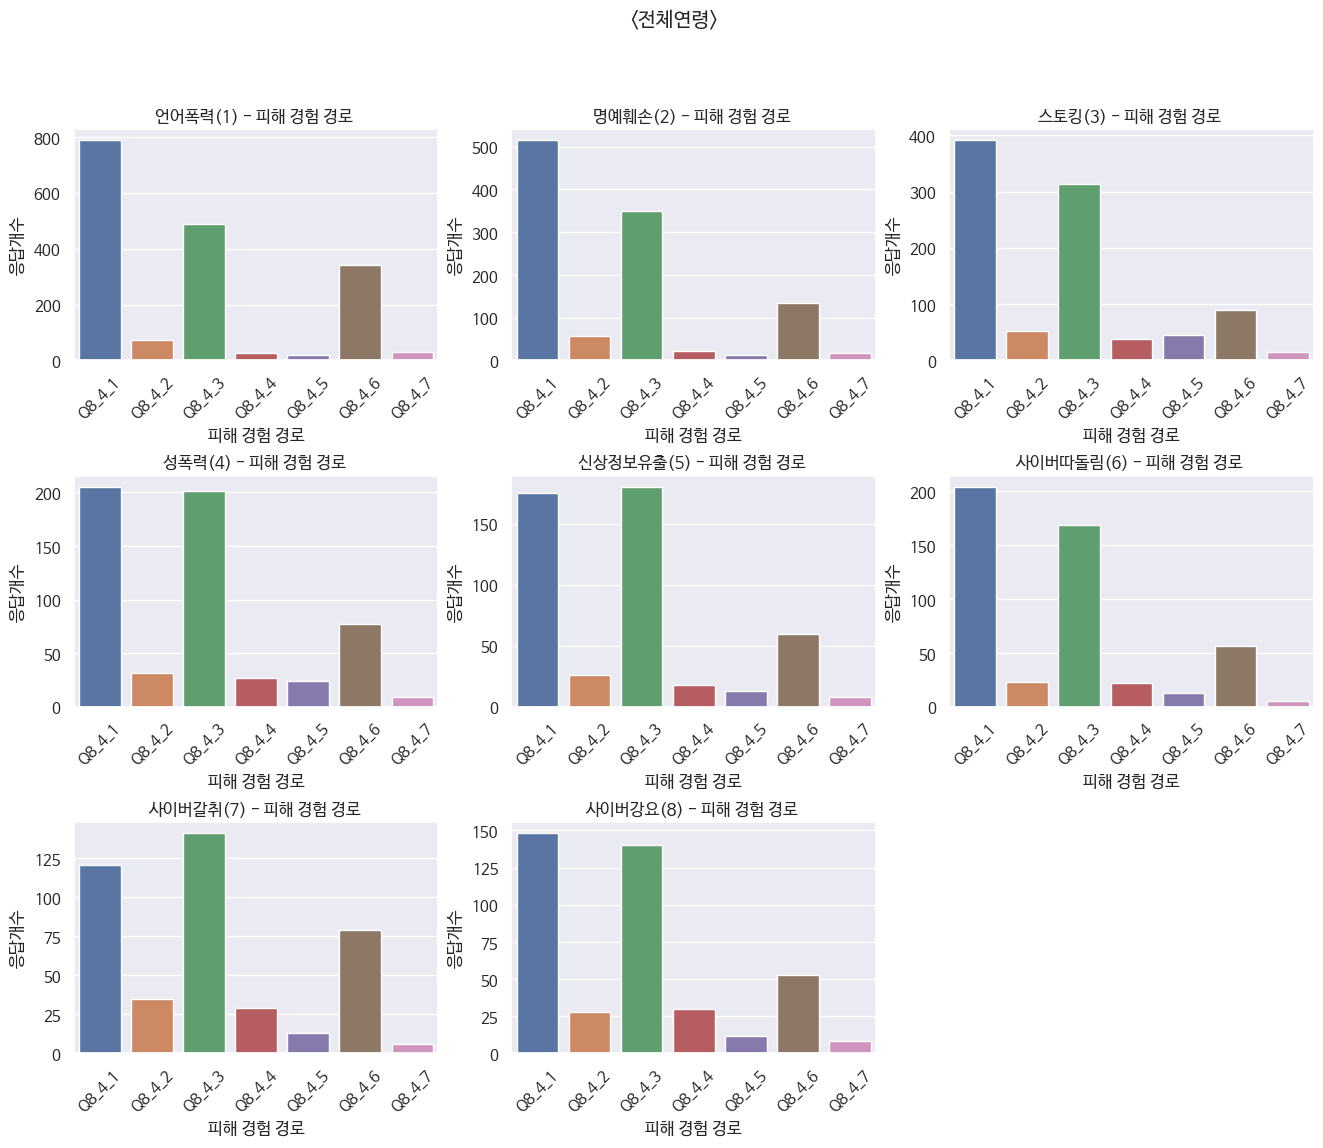

In [ ]:
analyze_service(df_have_exp,'전체연령')

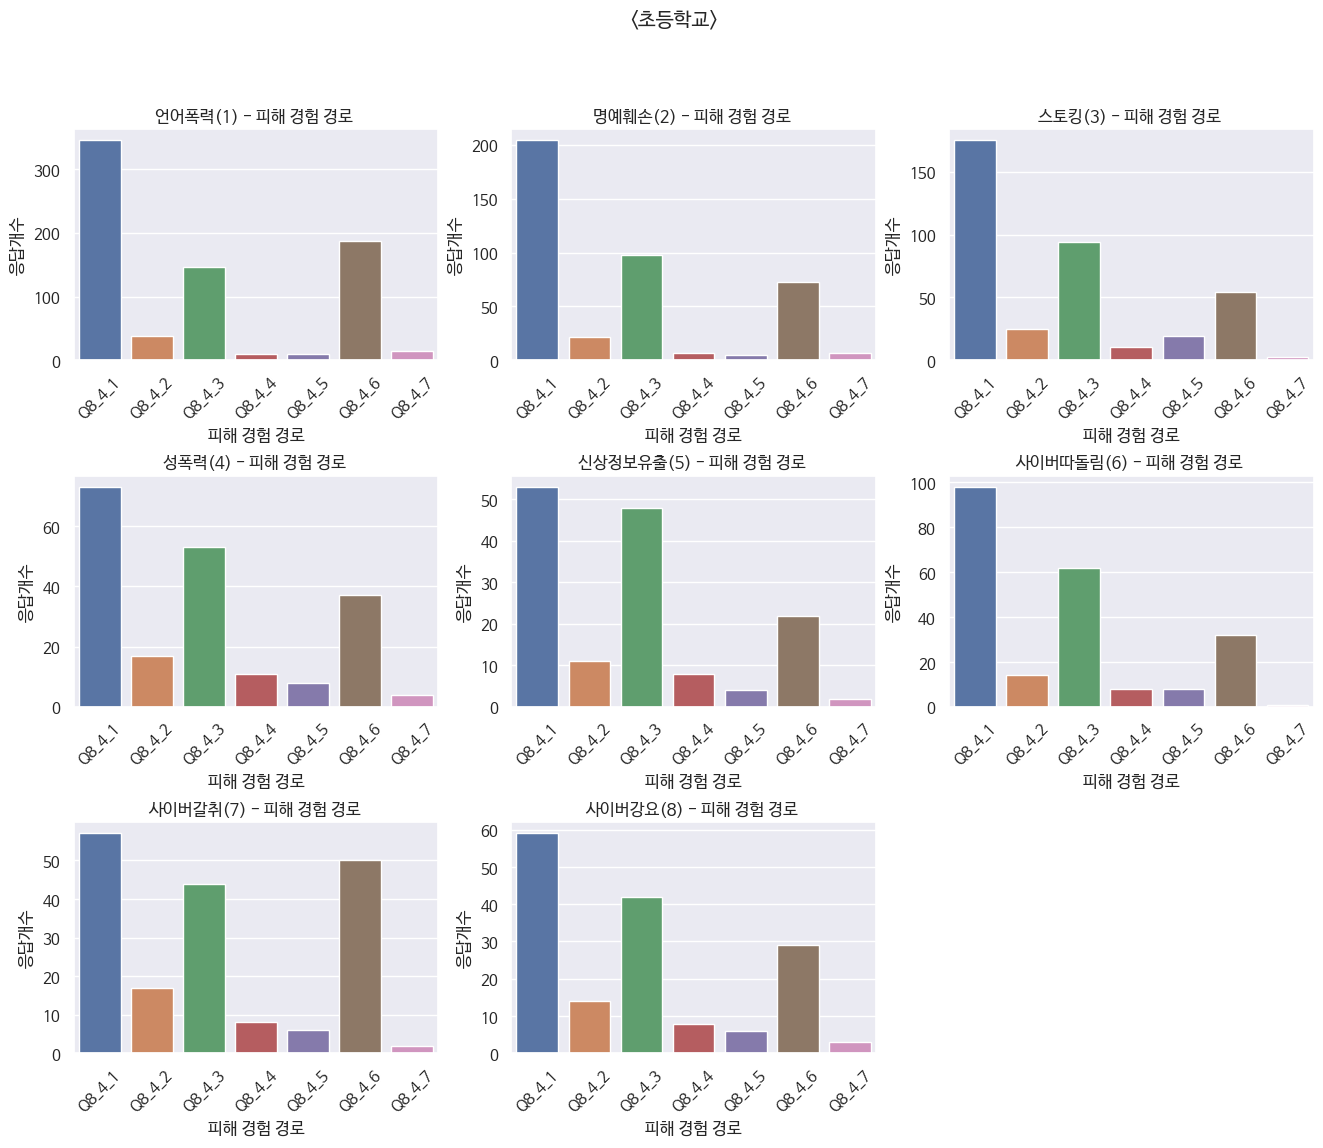

In [ ]:
analyze_service(df_have_exp.loc[df_have_exp['학교급']=='초등학교'], '초등학교')

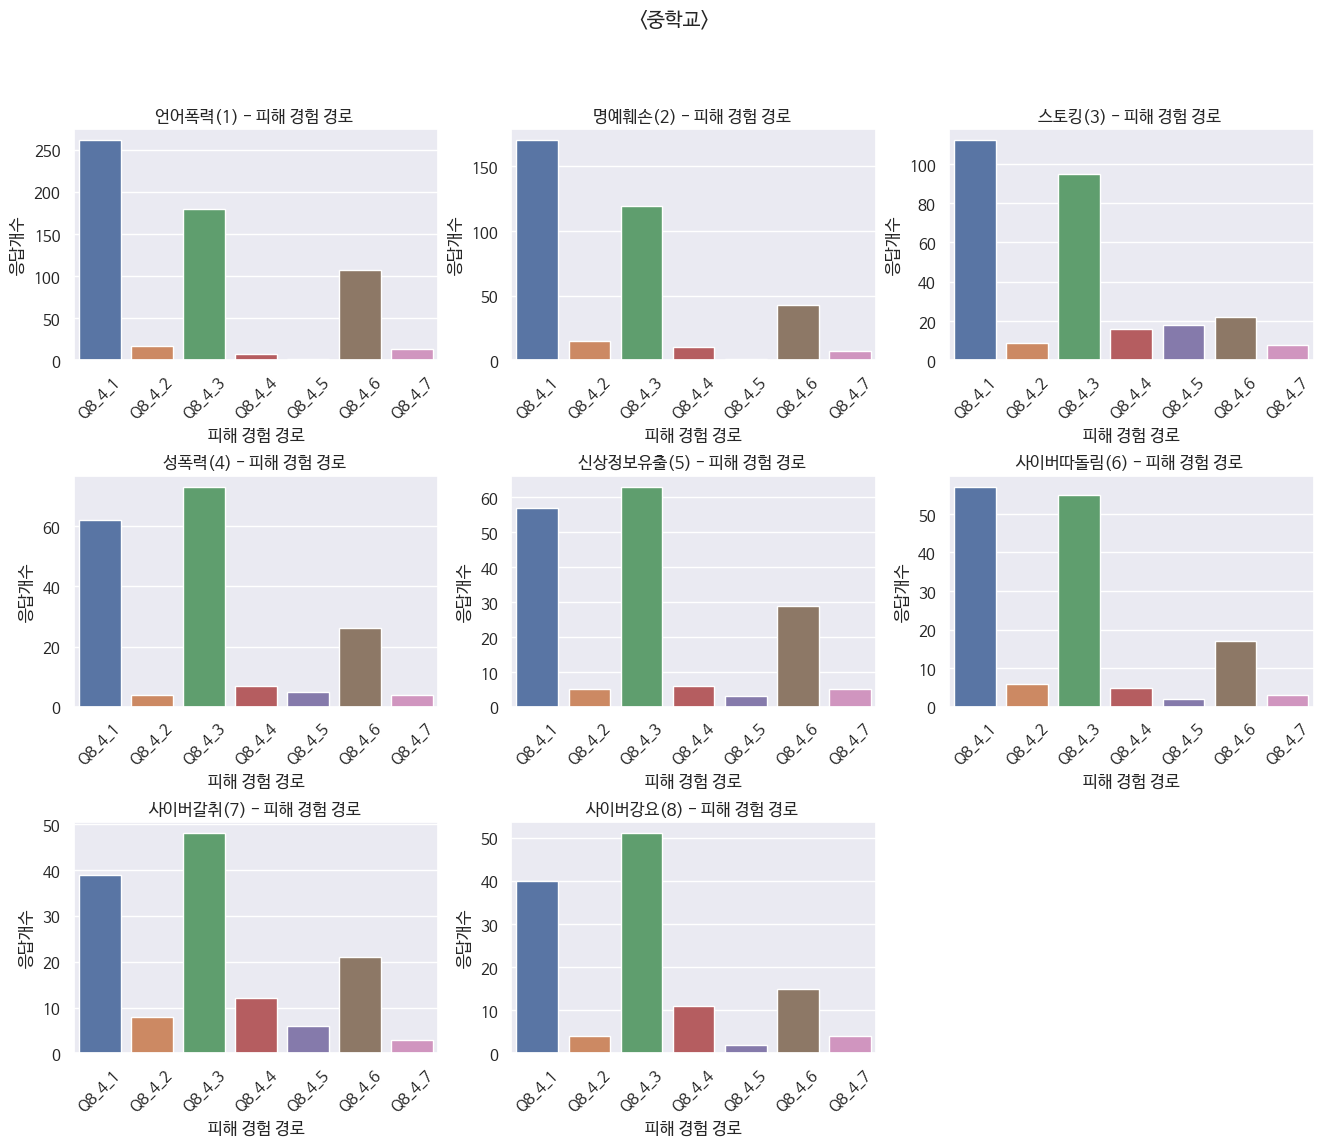

In [ ]:
analyze_service(df_have_exp.loc[df_have_exp['학교급']=='중학교'],'중학교')

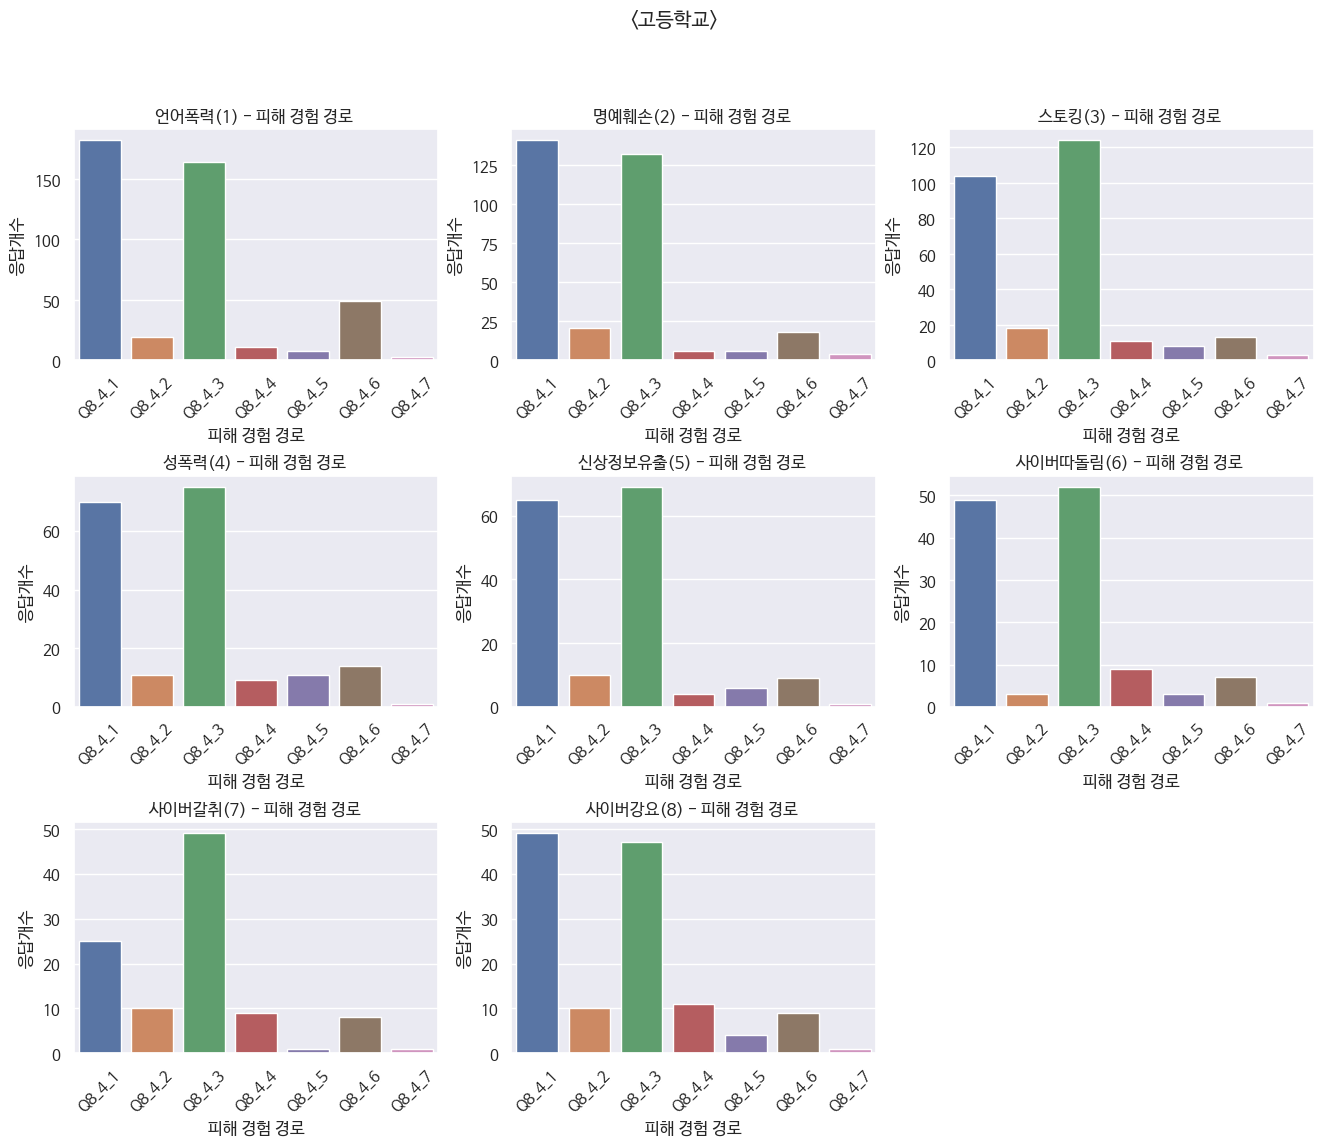

In [ ]:
analyze_service(df_have_exp.loc[df_have_exp['학교급']=='고등학교'],'고등학교')

## 1-5. 초중고별 피해 경험 - 대처방법

Q8_6_1    330
Q8_6_2    219
Q8_6_3    233
Q8_6_4     39
Q8_6_5      9
Q8_6_6    200
dtype: int64

Q8_6_1    273
Q8_6_2    174
Q8_6_3    149
Q8_6_4     34
Q8_6_5     23
Q8_6_6    161
dtype: int64

Q8_6_1    270
Q8_6_2    142
Q8_6_3    104
Q8_6_4     32
Q8_6_5      8
Q8_6_6    138
dtype: int64

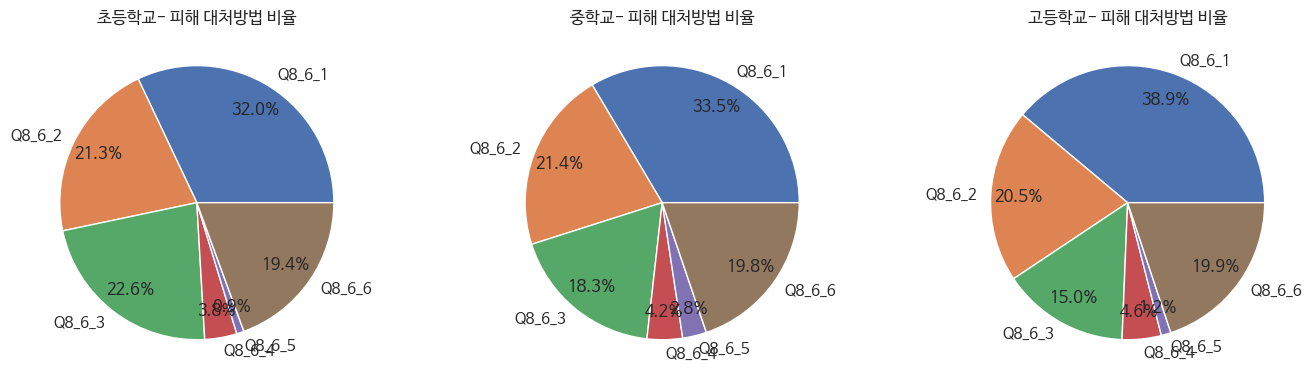

In [ ]:
# 초중고별 피해 대처방법 단변량 분석 Q8_6_1~6


#1. 피해경험==1인 사람들 중 초중고별 대처유형 전체 통계

fig = plt.figure(figsize=(14, 4))
cols_target = ['Q8_6_1','Q8_6_2','Q8_6_3','Q8_6_4','Q8_6_5','Q8_6_6']
for i, grade in enumerate(['초등학교','중학교', '고등학교'], 1):
    temp_df = df_have_exp.loc[(df_have_exp['학교급'] == grade)& (df_have_exp['피해경험']==1),cols_target]
    non_null_counts = temp_df.notnull().sum()
    display(non_null_counts)
    ax = fig.add_subplot(1, 3, i)
    # non_null_counts.plot(kind='bar', ax=ax)           #<-- 막대그래프로 표시할 때
    plt.pie(non_null_counts, labels=non_null_counts.index, autopct='%.1f%%', pctdistance = 0.8)    # 파이차트
    

    # ax.set(xlabel= '대처 방법',ylabel = '응답 개수', title = f'{grade}- 피해 대처방법 비율')      #<-- 막대그래프로 표시할 때
    ax.set(title = f'{grade}- 피해 대처방법 비율')

    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Q8_6_1    253
Q8_6_2    154
Q8_6_3    138
Q8_6_4     21
Q8_6_5      5
Q8_6_6    162
dtype: int64

Q8_6_1    218
Q8_6_2    112
Q8_6_3     80
Q8_6_4     14
Q8_6_5     19
Q8_6_6    127
dtype: int64

Q8_6_1    182
Q8_6_2     99
Q8_6_3     53
Q8_6_4     13
Q8_6_5      7
Q8_6_6    120
dtype: int64

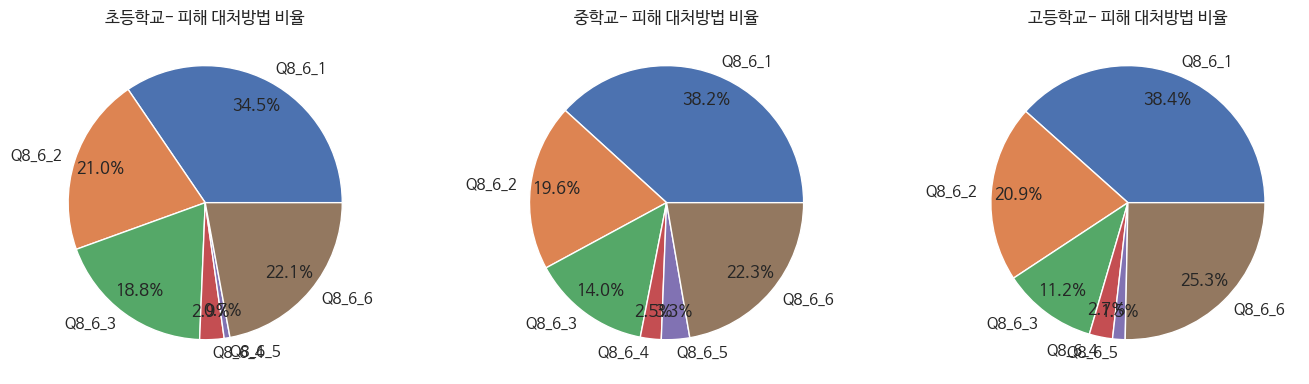

In [ ]:
# 2. Q8-3-피해 지속기간에 따른 대처유형 분석 -> 1회에 그친 경우(대부분이긴 함)

fig = plt.figure(figsize=(14, 4))
cols_target = ['Q8_6_1','Q8_6_2','Q8_6_3','Q8_6_4','Q8_6_5','Q8_6_6']
for i, grade in enumerate(['초등학교','중학교', '고등학교'], 1):
    temp_df = df_have_exp.loc[(df_have_exp['학교급'] == grade)& (df_have_exp['Q8_3'].between(1,1)),cols_target]
    non_null_counts = temp_df.notnull().sum()
    display(non_null_counts)
    ax = fig.add_subplot(1, 3, i)
    # non_null_counts.plot(kind='bar', ax=ax)           #<-- 막대그래프로 표시할 때
    plt.pie(non_null_counts, labels=non_null_counts.index, autopct='%.1f%%', pctdistance = 0.8)    # 파이차트
    

    # ax.set(xlabel= '대처 방법',ylabel = '응답 개수', title = f'{grade}- 피해 대처방법 비율')      #<-- 막대그래프로 표시할 때
    ax.set(title = f'{grade}- 피해 대처방법 비율')

    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Q8_6_1    77
Q8_6_2    65
Q8_6_3    95
Q8_6_4    18
Q8_6_5     4
Q8_6_6    38
dtype: int64

Q8_6_1    55
Q8_6_2    62
Q8_6_3    69
Q8_6_4    20
Q8_6_5     4
Q8_6_6    34
dtype: int64

Q8_6_1    88
Q8_6_2    43
Q8_6_3    51
Q8_6_4    19
Q8_6_5     1
Q8_6_6    18
dtype: int64

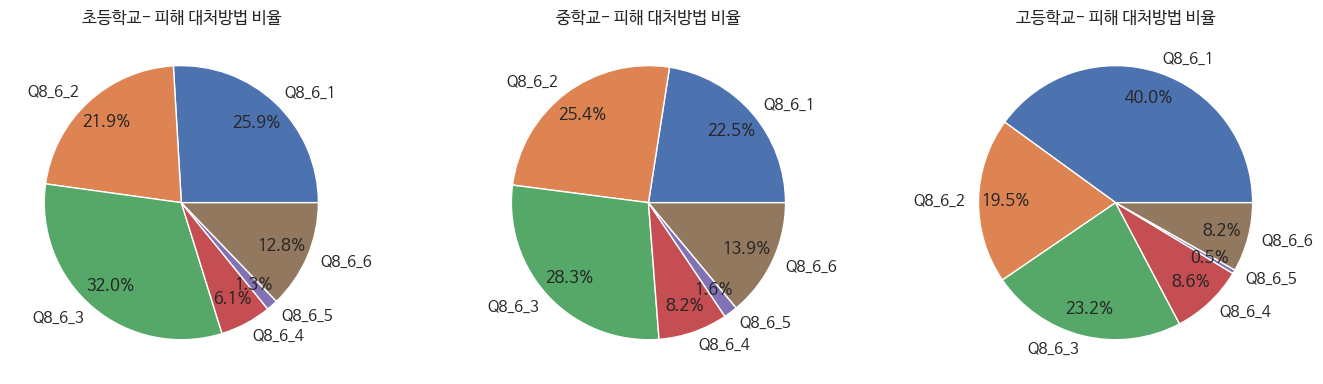

In [ ]:
# 2. Q8-3-피해 지속기간에 따른 대처유형 분석 -> 2회 이상 지속됨(1개월미만~1년이상)

fig = plt.figure(figsize=(14, 4))
cols_target = ['Q8_6_1','Q8_6_2','Q8_6_3','Q8_6_4','Q8_6_5','Q8_6_6']
for i, grade in enumerate(['초등학교','중학교', '고등학교'], 1):
    temp_df = df_have_exp.loc[(df_have_exp['학교급'] == grade)& (df_have_exp['Q8_3'].between(2,6)),cols_target]
    non_null_counts = temp_df.notnull().sum()
    display(non_null_counts)
    ax = fig.add_subplot(1, 3, i)
    # non_null_counts.plot(kind='bar', ax=ax)           #<-- 막대그래프로 표시할 때
    plt.pie(non_null_counts, labels=non_null_counts.index, autopct='%.1f%%', pctdistance = 0.8)    # 파이차트
    

    # ax.set(xlabel= '대처 방법',ylabel = '응답 개수', title = f'{grade}- 피해 대처방법 비율')      #<-- 막대그래프로 표시할 때
    ax.set(title = f'{grade}- 피해 대처방법 비율')

    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:

# 2. 피해 유형별 대처방안 분석
def analyze_actions_by_type(df_have_exp,age):
    i = 1
    cols_target = ['Q8_6_1','Q8_6_2','Q8_6_3','Q8_6_4','Q8_6_5','Q8_6_6']  # 대처 유형
    plt.figure(figsize = (16,12))
    plt.subplots_adjust(hspace = 0.5)
    plt.suptitle(f'<{age}>')
    for p_type in ['Q8a_1', 'Q8a_2', 'Q8a_3', 'Q8a_4', 'Q8a_5', 'Q8a_6', 'Q8a_7','Q8a_8']:
        
        temp = df_have_exp.loc[(df_have_exp['피해경험']==1) & (df_have_exp[p_type]<=5), cols_target].copy()
        # Q8_6_1~6 -> 어떤 대처를 하였는가?
        non_null_counts = temp.notnull().sum()
        # display(non_null_counts)
        
        plt.subplot(3,3,i)
        non_null_counts.plot(kind='bar')           #<-- 막대그래프로 표시할 때
        plt.xlabel('대처 유형')
        plt.ylabel('응답 개수')
        plt.title(f'{type_dict[p_type]} - 피해 경험 대처 방법 ')
        plt.xticks(rotation=45)
        i+=1
    plt.show()

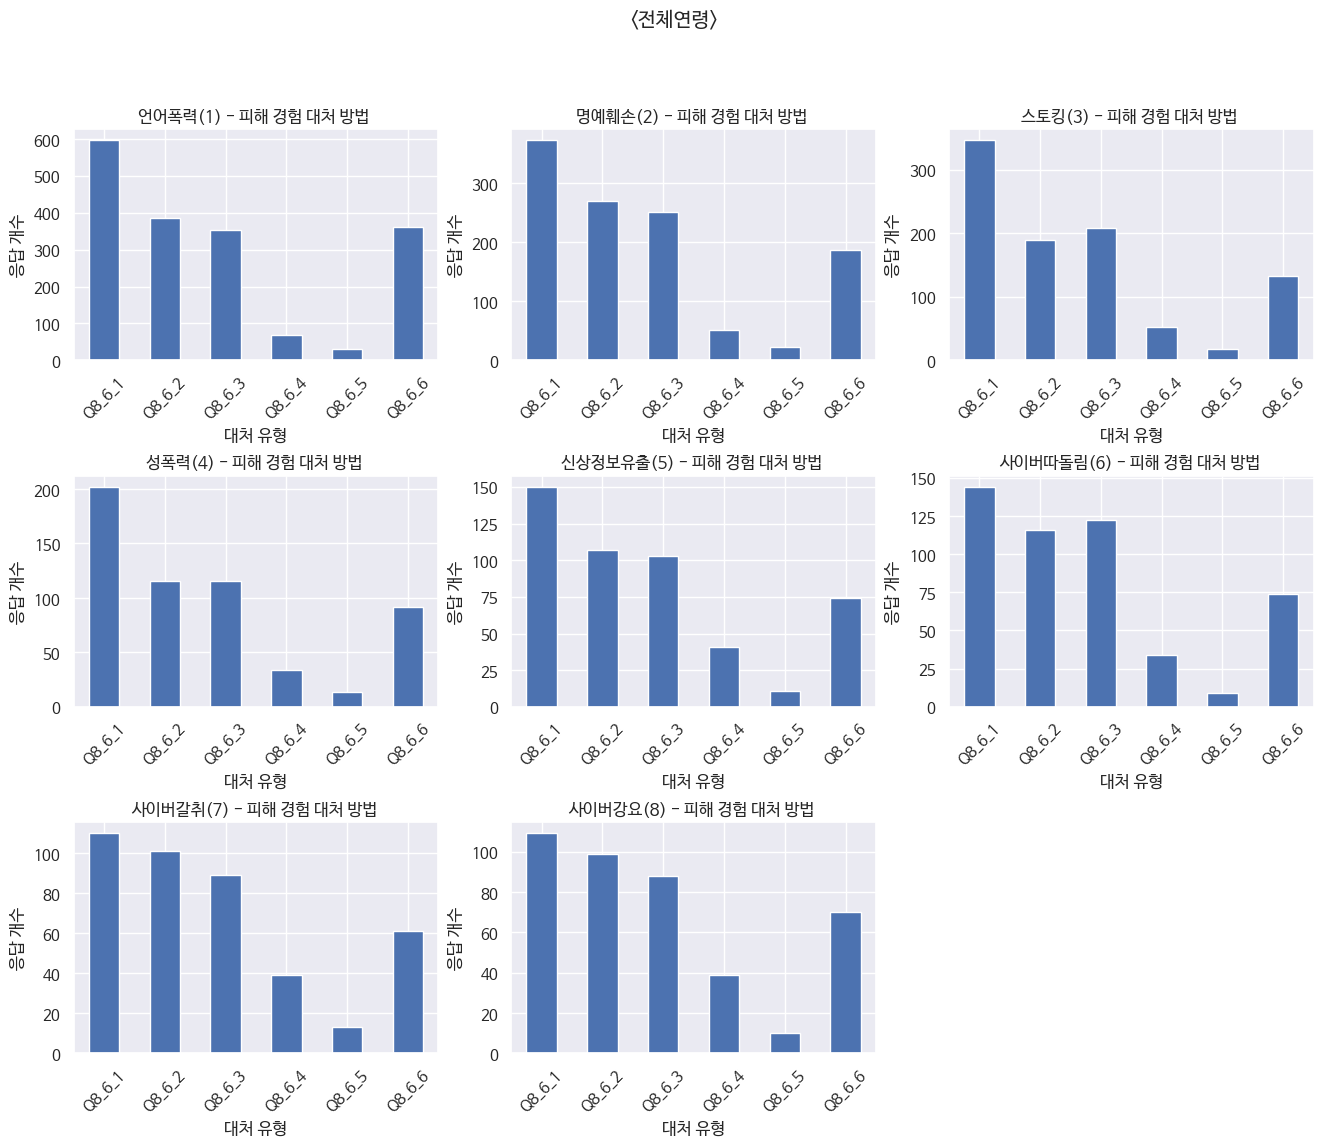

In [ ]:
# 전체
analyze_actions_by_type(df_have_exp,'전체연령')

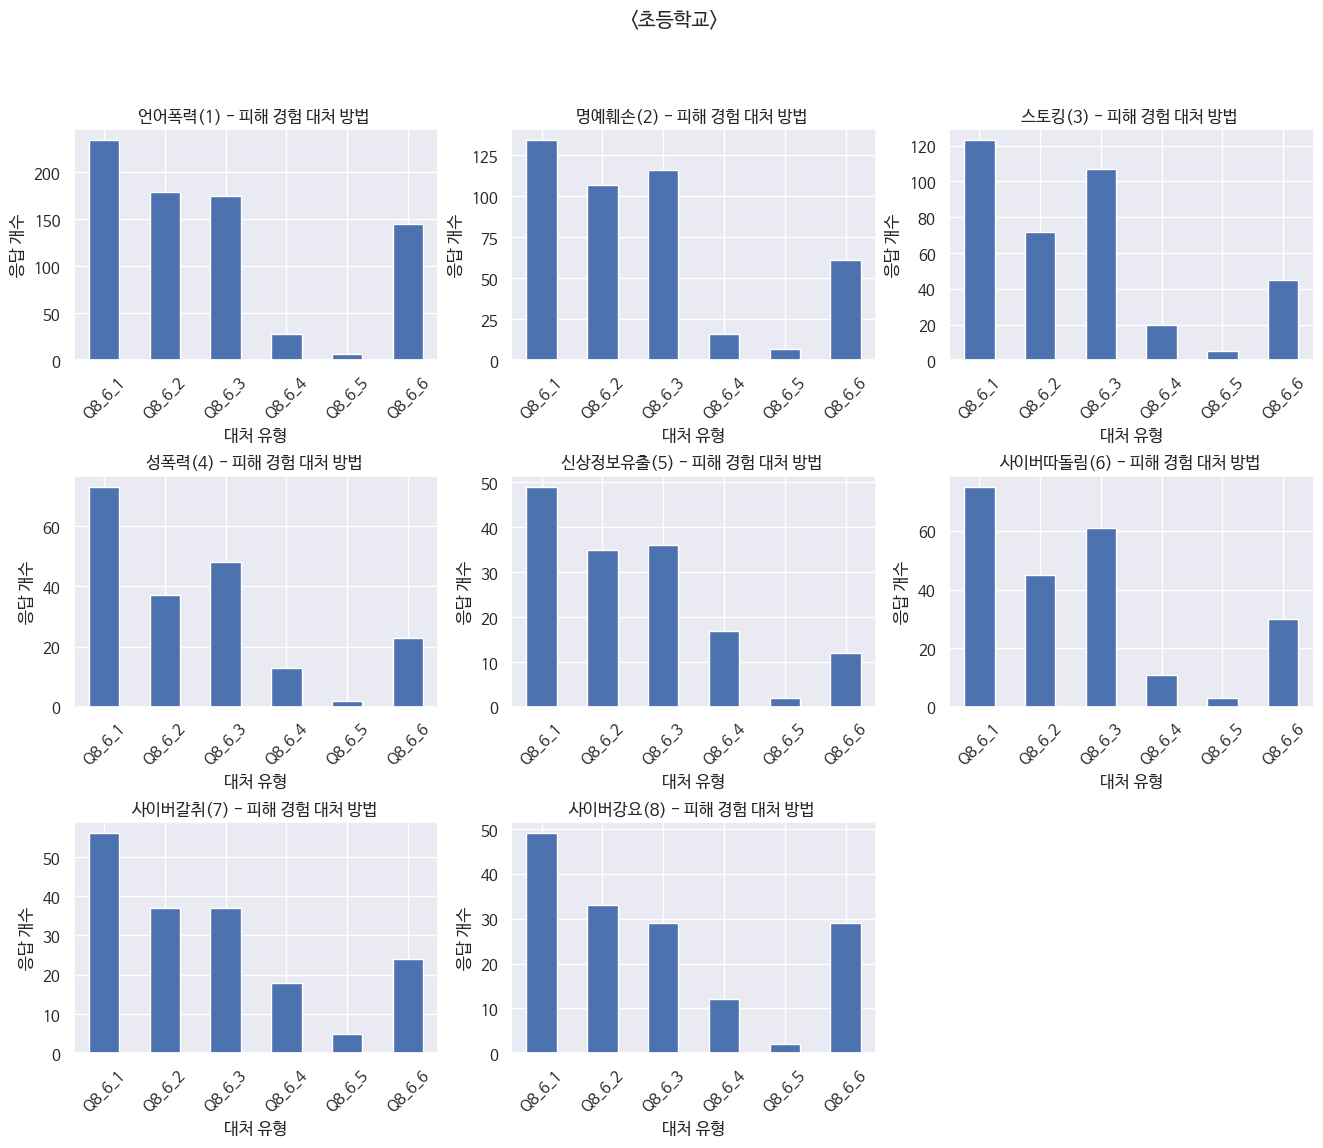

In [ ]:
analyze_actions_by_type(df_have_exp.loc[df_have_exp['학교급']=='초등학교'],'초등학교')

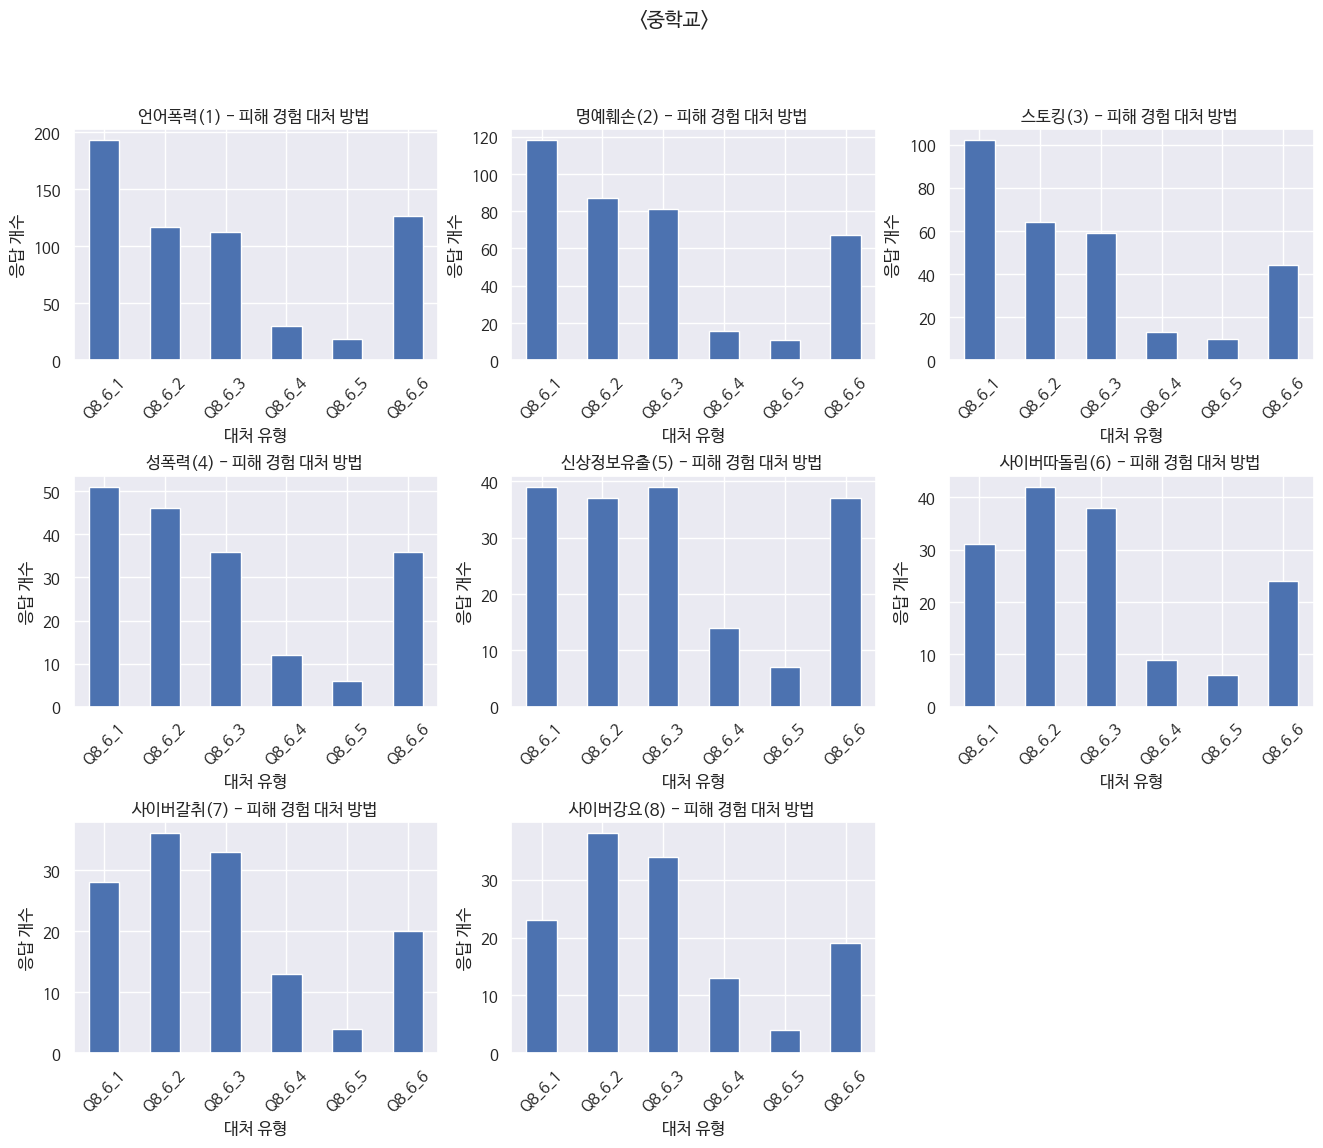

In [ ]:
analyze_actions_by_type(df_have_exp.loc[df_have_exp['학교급']=='중학교'],'중학교')

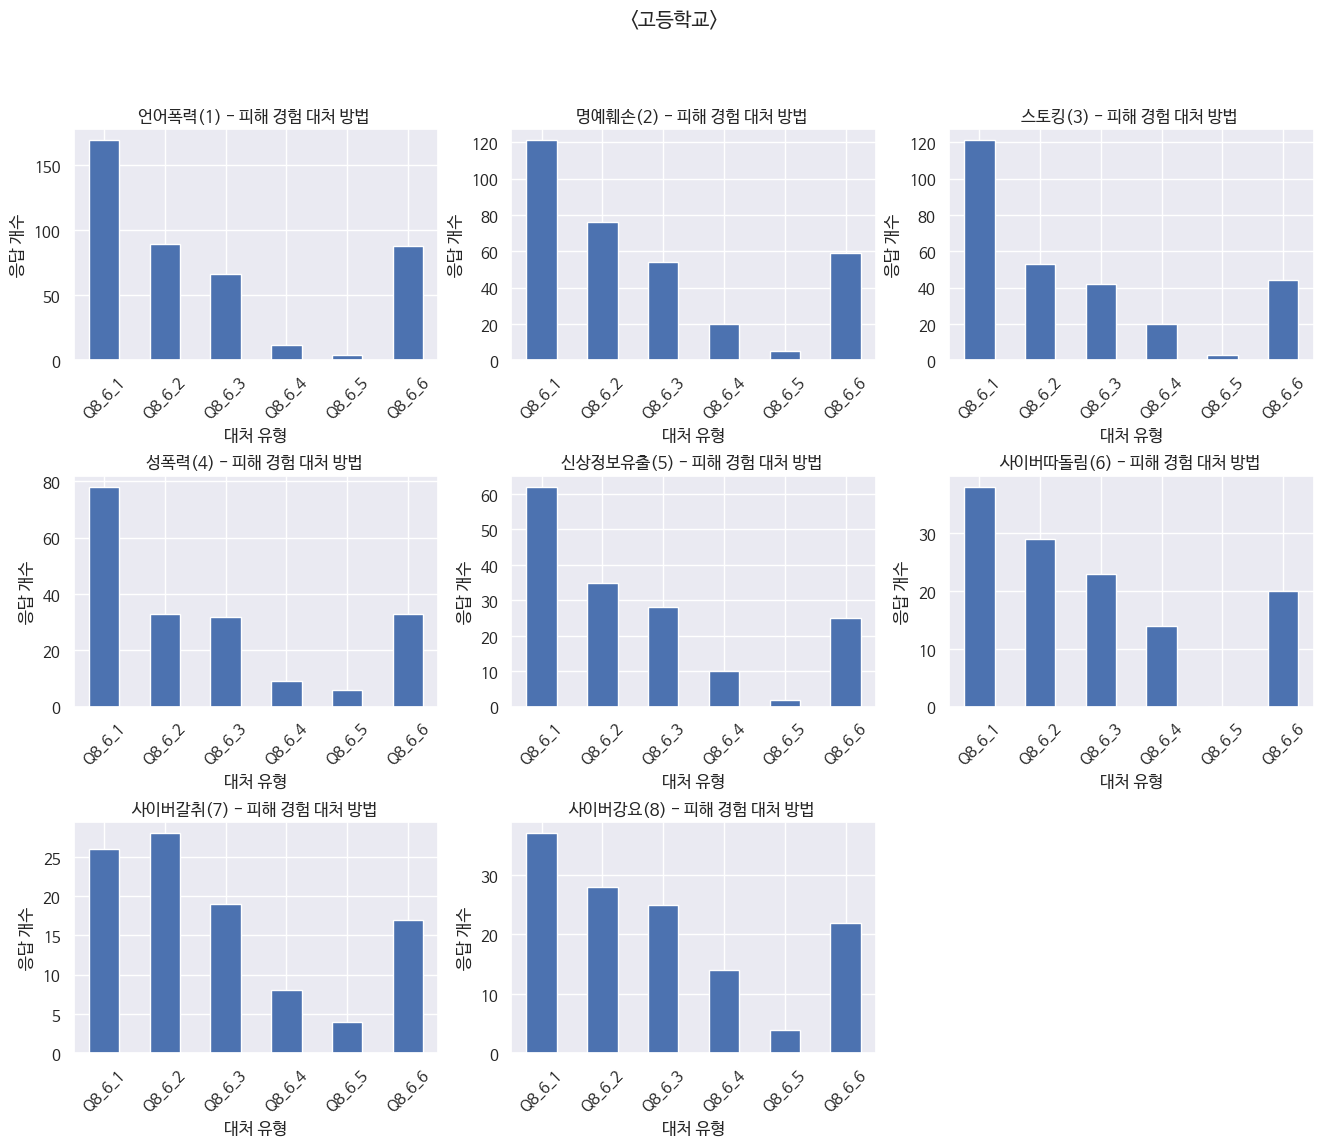

In [ ]:
analyze_actions_by_type(df_have_exp.loc[df_have_exp['학교급']=='고등학교'],'고등학교')

### * 신고 여부 분석

In [ ]:
df_have_exp.loc[df_have_exp['Q8_6_4'].notnull(),'학교급'].value_counts()

초등학교    39
중학교     34
고등학교    32
Name: 학교급, dtype: int64

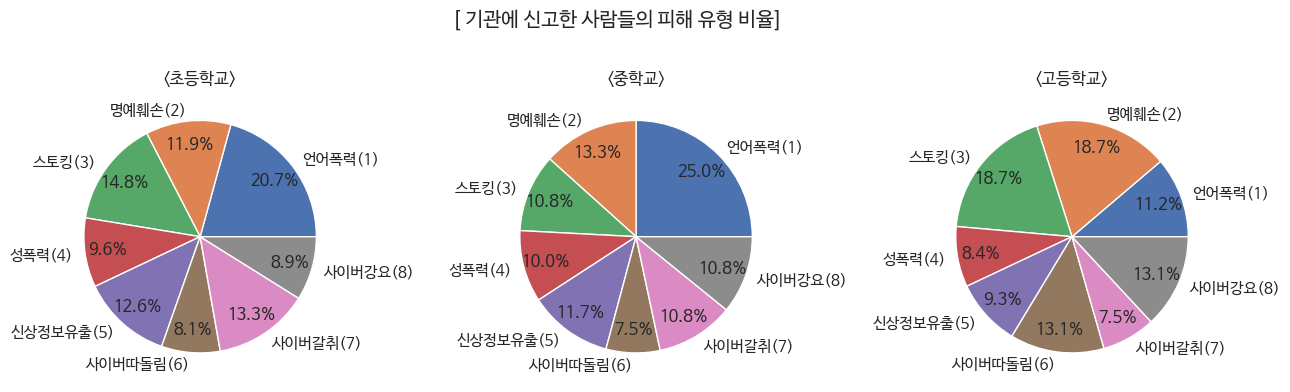

In [ ]:
# 피해대처 유형 중, 기관에 신고한 사람: 총 105명
# 피해경험==1 중 기관에 신고함 0,1 ->  왜신고했을까??

# 기관에 신고한 사람들의 피해 유형 - 초,중,고

type_dict = {
    'Q8a_1': '언어폭력(1)',
    'Q8a_2': '명예훼손(2)',
    'Q8a_3': '스토킹(3)',
    'Q8a_4': '성폭력(4)',
    'Q8a_5': '신상정보유출(5)',
    'Q8a_6': '사이버따돌림(6)',
    'Q8a_7': '사이버갈취(7)',
    'Q8a_8': '사이버강요(8)'
}

cols_ptype = ['Q8a_1', 'Q8a_2', 'Q8a_3', 'Q8a_4', 'Q8a_5', 'Q8a_6', 'Q8a_7','Q8a_8']

# temp = df_have_exp.loc[(df_have_exp['Q8_6_4'].notnull()) & (df_have_exp['학교급']=='중학교'),cols_ptype]
# melted_df = temp.melt(var_name='p_type', value_name='Experienced')
# melted_df = melted_df.loc[melted_df['Experienced'] != 9]
# melted_df['p_type'] = melted_df['p_type'].apply(lambda x: type_dict[x])

# sns.countplot(melted_df, x = 'p_type')
# # plt.pie(melted_df, labels=[type_dict[col] for col in cols_ptype], autopct='%.1f%%', pctdistance=0.8)

# plt.xticks(rotation=45)
# plt.show()



plt.figure(figsize = (15,7))
# labels = [type_dict[col] for col in non_null_counts.index]
i=1
plt.suptitle('[ 기관에 신고한 사람들의 피해 유형 비율]',y=0.82) # y 값을 조절하여 제목 위치 변경
for school in ['초등학교','중학교','고등학교']:
    temp = df_have_exp.loc[(df_have_exp['Q8_6_4'].notnull()) & (df_have_exp['학교급']==school),cols_ptype]
    filtered_temp = temp.applymap(lambda x: x if x <= 5 else np.nan)    # 5이하 값만 유효, 9는 NaN으로 처리
    non_null_counts = filtered_temp.count()
    # 컬럼명에 대한 설명을 라벨로 사용
    plt.subplot(1,3,i)
    plt.pie(non_null_counts, labels=[type_dict[col] for col in non_null_counts.index], autopct='%.1f%%', pctdistance=0.8)
    plt.title(f'<{school}>')
    i+=1
plt.subplots_adjust(wspace=0.5) # 가로 간격 조정
# plt.legend(labels, title="설명", loc="upper right",bbox_to_anchor = (1.6,1.2)) # bbox_to_anchor =(x,y) ->차트에서 몇배 옮길지 좌표
plt.show()



### * 아무 행동 하지 x -> 이유 분석
- Q8_7_1 ~ 8

In [ ]:
# 아무 행동 하지 않음 응답 총 개수 499 (499/2067) -> 각 학교급별로도 20퍼 정도 됨
print("아무 행동x 총 응답 수: ", df_have_exp['Q8_6_6'].notnull().sum())
print("아무 행동x 총 응답 비율: ", df_have_exp['Q8_6_6'].notnull().sum()/df_have_exp.loc[df_have_exp['피해경험']==1].shape[0])


아무 행동x 총 응답 수:  499
아무 행동x 총 응답 비율:  0.24141267537493952


In [ ]:
# 아무 행동 하지 않음 각 응답 별 개수 확인
cols_reason = ['Q8_7_1','Q8_7_2','Q8_7_3','Q8_7_4','Q8_7_5','Q8_7_6','Q8_7_7','Q8_7_8']
temp = df_have_exp.loc[df_have_exp['Q8_6_6'].notnull(),cols_reason]
non_null_counts = temp.isna().sum()
non_null_counts

Q8_7_1    452
Q8_7_2    444
Q8_7_3    445
Q8_7_4    441
Q8_7_5    466
Q8_7_6    475
Q8_7_7    216
Q8_7_8    416
dtype: int64

In [ ]:
# 아무 행동 하지 않음 각 응답 별 개수 시각화

Q8_7_description = {
    "Q8_7_1": "(1)친구들로부터 더 심한 따돌림 받을까봐",
    "Q8_7_2": "(2)어디에 도움 요청해야 할지 몰라서",
    "Q8_7_3": "(3)피해 준 상대방이 누군지 몰라서",
    "Q8_7_4": "(4)대응해도 피해 멈출것 같지 x",
    "Q8_7_5": "(5)상대방이 보복할까봐",
    "Q8_7_6": "(6)(괴롭히는 친구라도)친구 잃을까봐",
    "Q8_7_7": "(7)별일 아니라 생각해서",
    "Q8_7_8": "(8)나에게도 잘못 있다고 생각해서",
}


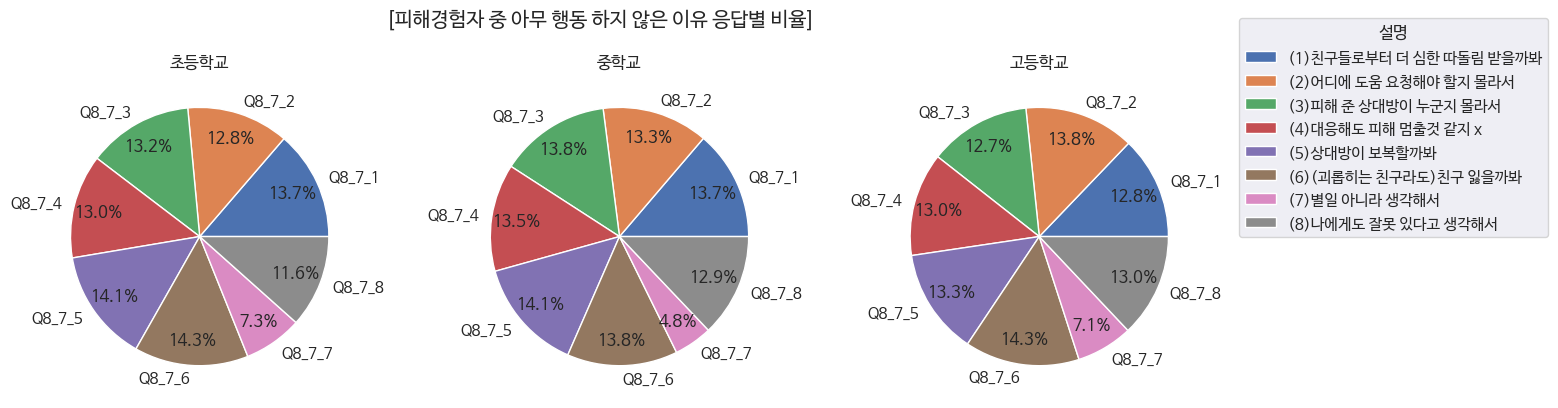

In [ ]:
plt.figure(figsize = (15,7))
labels = [Q8_7_description[col] for col in cols_reason]
i=1
plt.suptitle('[피해경험자 중 아무 행동 하지 않은 이유 응답별 비율]',y=0.82) # y 값을 조절하여 제목 위치 변경
for school in ['초등학교','중학교','고등학교']:
    temp = df_have_exp.loc[(df_have_exp['Q8_6_6'].notnull())&(df_have_exp['학교급']==school),cols_reason]
    non_null_counts = temp.isna().sum()
    non_null_counts
    # 컬럼명에 대한 설명을 라벨로 사용
    plt.subplot(1,3,i)
    plt.pie(non_null_counts, labels=non_null_counts.index, autopct='%.1f%%', pctdistance=0.8)
    plt.title(f'{school}')
    i+=1
plt.subplots_adjust(wspace=0.3) # 가로 간격 조정
plt.legend(labels, title="설명", loc="upper right",bbox_to_anchor = (2.1,1.2)) # bbox_to_anchor =(x,y) ->차트에서 몇배 옮길지 좌표
plt.show()


In [ ]:
# 어디에 도움 요청해야 할지 몰랐다는 친구들 -> 예방교육을 받았는가? 신고기관을 정말 모르는가? 통계분석해보기


In [ ]:
# 사이버폭력 관련 기관에 도움 요청 x 이유
list(df_have_exp.loc[df_have_exp['Q8_8_6_etc'].notnull(),'Q8_8_6_etc'])

['온라인상에서 일어나는것이라서 부모님한테 말하니 도움을 주시고 친구들도 도움을 줘서 잘 해결기 때문이다',
 '게임아이디 도용이라서',
 '상대가 누구인지 모르고 잡을 수 없을 거라고 생각',
 '없다',
 '없음',
 '바로 끝나서',
 '없다',
 '친구랑 놀다가 싸운거여서',
 '사과요구를상대방이들어주어서',
 '삭제하면돼서요',
 '가족과 해결',
 '해결할 수 있어서(친구와 다퉈서 욕한거임)',
 '크게 신경쓸 일은 아니여서',
 '없어요',
 '나혼자서 충분히 해결할 수 있어서이다.',
 '큰 일이 아니여서',
 '내가 집적 끝내고 싶어서',
 '나 혼자 해결할 수 있을 것 같아서',
 '없음',
 '없음',
 '당사자 사이 해결되어서',
 '딱히그때말고는 신경쓰고싶지 않아서',
 '모르겠다',
 '그냥',
 '해결된 일이여서',
 '가족에게 알려서',
 '게임 안에서 욕설을 쓴거라 차단하면 끝이라서',
 '부모님에게 말씀해서',
 '내가 해결할수 있으니까',
 '괴롭힘울 당하지 않아서 도움 요청하지않음',
 '나의 기분이 많이 나쁘지 않아서',
 '없음',
 '친구끼리 장난 한거여서',
 '없다',
 '괴롭힌 사람이 무서워서',
 '없다',
 '어른들이 애초에 엮이면 안되지 라고 할까봐',
 '없음',
 '없다',
 '내가 할수있는일 이여서',
 '실제로도 큰 일이 아니기 때문',
 '많히 심하진 않 아서',
 '체크오류',
 '어쩌다 한두번이라 거의 해당사항 없음',
 '나 혼자 할수있는 이야기 인 것 같아서',
 '없음',
 '당한적 없음',
 '없음',
 '없음',
 '없음',
 '나 혼자 할수있는 이야기 인 것 같아서',
 '내가 알아서 뭐라고 하니까',
 '별로 큰 사건이 아니어서',
 '없음',
 '학교선생님의 도움을 받고있어서',
 '선은 지켰다',
 '친구랑 장난친거여서',
 '화해해서',
 '그녀석이랑 장난으로',
 '그냥..',
 '어차피 장난이라는 걸 알고 친한 친구라서 그럴 수도 있지라고 생각해서 그냥 하지 말라고만 했다',

In [ ]:
df_have_exp['Q8_8'].dropna().unique()

array([4., 3., 2., 5., 1., 6.])

In [ ]:
tmp = df_have_exp.loc[(df_have_exp['Q8_8'].notnull()),'Q8_8']
tmp = tmp.value_counts(dropna = True,sort=False).sort_index()
tmp

1.0    137
2.0    845
3.0    367
4.0    328
5.0    140
6.0    145
Name: Q8_8, dtype: int64

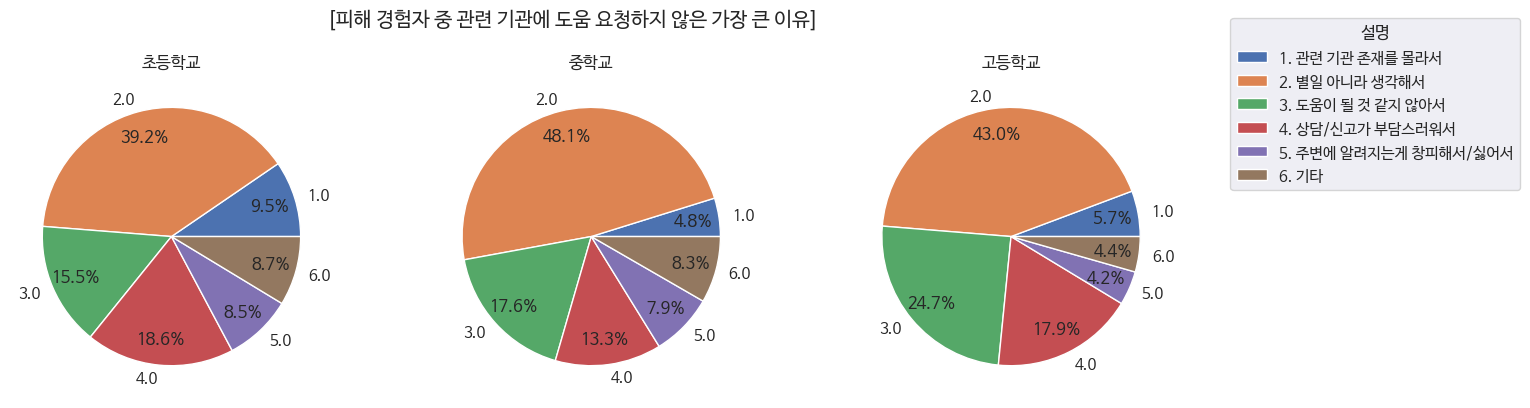

In [ ]:
# 관련 기관에 도움 요청 하지 않은 가장 큰 이유
nohelp_reason_dict = {
    1.0 : '관련 기관 존재를 몰라서',
    2.0 : '별일 아니라 생각해서',
    3.0 : '도움이 될 것 같지 않아서',
    4.0 : '상담/신고가 부담스러워서',
    5.0 : '주변에 알려지는게 창피해서/싫어서',
    6.0 : '기타'
}
plt.figure(figsize = (15,7))
i=1
plt.suptitle('[피해 경험자 중 관련 기관에 도움 요청하지 않은 가장 큰 이유]',y=0.82) # y 값을 조절하여 제목 위치 변경
for school in ['초등학교','중학교','고등학교']:
    tmp = df_have_exp.loc[(df_have_exp['Q8_8'].notnull())&(df_have_exp['학교급']==school),'Q8_8']
    tmp = tmp.value_counts(dropna = True,sort=False).sort_index()
    plt.subplot(1,3,i)
    plt.pie(tmp, labels=tmp.index, autopct='%.1f%%', pctdistance=0.8)
    plt.title(f'{school}')
    i+=1
plt.subplots_adjust(wspace=0.3) # 가로 간격 조정
plt.legend(labels = [f"{i:.0f}. {nohelp_reason_dict[i]}" for i in tmp.index], title="설명", loc="upper right",bbox_to_anchor = (2.1,1.2)) # bbox_to_anchor =(x,y) ->차트에서 몇배 옮길지 좌표
plt.show()


In [ ]:
df.loc[(df['Q8_8'].notnull()),['학교급','Q8_8']]

,학교급,Q8_8
42,초등학교,4.0
46,초등학교,3.0
57,초등학교,4.0
61,초등학교,2.0
65,초등학교,5.0
...,...,...
8966,고등학교,2.0
8972,고등학교,4.0
8976,고등학교,3.0
8991,고등학교,5.0
